## Change sys.path to use my tensortrade instead of the one in env

In [1]:
import sys
import os
# sys.path.append("/Users/jasonfiacco/Documents/Yale/Senior/thesis/deeptrader")
# sys.path.append("/Users/jasonfiacco/Documents/Yale/Senior/thesis/deeptrader/GetOldTweets")
sys.path.append(os.path.realpath(".."))
sys.path.append(os.path.realpath("../GetOldTweets"))
print(sys.path)

['/home/accts/jcf73/thesis/deeptrader/examples', '/home/accts/jcf73/thesis/venv/lib64/python37.zip', '/home/accts/jcf73/thesis/venv/lib64/python3.7', '/home/accts/jcf73/thesis/venv/lib64/python3.7/lib-dynload', '/usr/lib64/python3.7', '/usr/lib/python3.7', '', '/home/accts/jcf73/thesis/venv/lib/python3.7/site-packages', '/home/accts/jcf73/thesis/venv/lib/python3.7/site-packages/IPython/extensions', '/home/accts/jcf73/.ipython', '/home/accts/jcf73/thesis/deeptrader', '/home/accts/jcf73/thesis/deeptrader/GetOldTweets']


## Fetch the Labeled PredictIt Data  
Adds ALL TA features at first. Also creates the "price_norm" metric which is close/open.

In [2]:
import ssl
import pandas as pd
import ta
from datetime import datetime, timedelta

ssl._create_default_https_context = ssl._create_unverified_context # Only used if pandas gives a SSLError

def fetch_data(symbol):
    path = "../predictit_datasets/"
    filename = "{}_labeled.csv".format(symbol)

    df = pd.read_csv(path + filename)
    
    df = df.set_index("Date")


    return df

In [3]:
all_data = pd.concat([
    fetch_data("WARREN"),
    fetch_data("CRUZ"),
    fetch_data("MANCHIN"),
    fetch_data("SANDERS"),
    fetch_data("NELSON"),
    fetch_data("DONNELLY"),
    fetch_data("PELOSI"),
    fetch_data("MANAFORT"),
    fetch_data("BROWN"),
    fetch_data("RYAN"),
    fetch_data("STABENOW"),
    fetch_data("KNIGHT"),
    fetch_data("MCCASKILL"),
    fetch_data("BALDWIN"),
    fetch_data("DENHAM"),
    fetch_data("HEITKAMP"),
    fetch_data("TESTER"),
    fetch_data("HURD"),
    fetch_data("HEINRICH"),
    fetch_data("MENENDEZ")
], axis=1)
all_data.head()

,WARREN:open,WARREN:low,WARREN:high,WARREN:close,WARREN:volume,WARREN:average,WARREN:price_norm,WARREN:current_date,WARREN:sentiment,WARREN:volume_adi,...,MENENDEZ:momentum_uo,MENENDEZ:momentum_stoch,MENENDEZ:momentum_stoch_signal,MENENDEZ:momentum_wr,MENENDEZ:momentum_ao,MENENDEZ:momentum_kama,MENENDEZ:momentum_roc,MENENDEZ:others_dr,MENENDEZ:others_dlr,MENENDEZ:others_cr
Date,,,,,,,,,,,,,,,,,,,,,
2017-02-01,0.81,0.79,0.82,0.80,768,0.8067,0.987654,2017-02-01,0.04693,-256.0,...,NaN,7.142857,7.142857,-92.857143,0.0,NaN,NaN,-4.508748,NaN,0.0
2017-02-02,0.80,0.79,0.80,0.79,50,0.7996,0.987500,2017-02-02,0.05167,-306.0,...,NaN,7.142857,7.142857,-92.857143,0.0,NaN,NaN,0.000000,0.0,0.0
2017-02-03,0.79,0.78,0.80,0.78,592,0.7813,0.987342,2017-02-03,0.07868,-898.0,...,NaN,7.142857,7.142857,-92.857143,0.0,NaN,NaN,0.000000,0.0,0.0
2017-02-04,0.78,0.78,0.79,0.79,10,0.7900,1.012821,2017-02-04,0.14822,-888.0,...,NaN,7.142857,7.142857,-92.857143,0.0,NaN,NaN,0.000000,0.0,0.0
2017-02-05,0.79,0.79,0.80,0.80,6,0.7950,1.012658,2017-02-05,-0.01526,-882.0,...,NaN,7.142857,7.142857,-92.857143,0.0,NaN,NaN,0.000000,0.0,0.0


## Plot the closing prices for all the markets

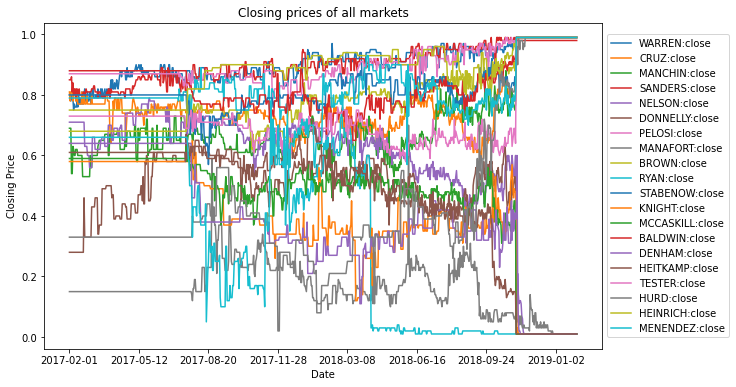

In [4]:
import matplotlib.pyplot as plt
closing_prices = all_data.loc[:, [("close" in name) for name in all_data.columns]]
closing_prices.plot(figsize=(10, 6))
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.title("Closing prices of all markets")
plt.legend(loc='center left', bbox_to_anchor=(1,.5))
plt.show()

In [5]:
#Copy it over cause of variable names
subset_data = all_data

## Define The Exchange

An exchange needs a name, an execution service, and streams of price data in order to function properly.

The setups supported right now are the simulated execution service using simulated or stochastic data. More execution services will be made available in the future, as well as price streams so that live data and execution can be supported.

In [6]:
from tensortrade.exchanges import Exchange
from tensortrade.exchanges.services.execution.simulated import execute_order
from tensortrade.data import Stream

#Exchange(name of exchange, service)
#It looks like each Stream takes a name, and then a list of the closing prices.

predictit_exch = Exchange("predictit", service=execute_order)(
    Stream("USD-WARREN", list(subset_data['WARREN:close'])),
    Stream("USD-CRUZ", list(subset_data['CRUZ:close'])),
    Stream("USD-MANCHIN", list(subset_data['MANCHIN:close'])),
    Stream("USD-SANDERS", list(subset_data['SANDERS:close'])),
    Stream("USD-NELSON", list(subset_data['NELSON:close'])),
    Stream("USD-DONNELLY", list(subset_data['DONNELLY:close'])),
    Stream("USD-PELOSI", list(subset_data['PELOSI:close'])),
    Stream("USD-MANAFORT", list(subset_data['MANAFORT:close'])),
    Stream("USD-BROWN", list(subset_data['BROWN:close'])),
    Stream("USD-RYAN", list(subset_data['RYAN:close'])),
    Stream("USD-STABENOW", list(subset_data['STABENOW:close'])),
    Stream("USD-KNIGHT", list(subset_data['KNIGHT:close'])),
    Stream("USD-MCCASKILL", list(subset_data['MCCASKILL:close'])),
    Stream("USD-BALDWIN", list(subset_data['BALDWIN:close'])),
    Stream("USD-DENHAM", list(subset_data['DENHAM:close'])),
    Stream("USD-HEITKAMP", list(subset_data['HEITKAMP:close'])),
    Stream("USD-TESTER", list(subset_data['TESTER:close'])),
    Stream("USD-HURD", list(subset_data['HURD:close'])),
    Stream("USD-HEINRICH", list(subset_data['HEINRICH:close'])),
    Stream("USD-MENENDEZ", list(subset_data['MENENDEZ:close']))
)

Now that the exchanges have been defined we can define our features that we would like to include, excluding the prices we have provided for the exchanges.

## Define the "Portfolio"

Make the portfolio using the any combinations of exchanges and intruments that the exchange supports

In [7]:
#I am going to have to add "instruments" for all 25 of the PredictIt markets I'm working with.
from tensortrade.instruments import USD, WARREN, CRUZ, MANCHIN, SANDERS, NELSON, DONNELLY,\
                                PELOSI, MANAFORT, BROWN, RYAN, STABENOW, KNIGHT, MCCASKILL, \
                                BALDWIN, DENHAM, HEITKAMP, TESTER, HURD, HEINRICH, MENENDEZ
from tensortrade.wallets import Wallet, Portfolio

portfolio = Portfolio(USD, [
    Wallet(predictit_exch, 100000 * USD),
    Wallet(predictit_exch, 0 * WARREN),
    Wallet(predictit_exch, 0 * CRUZ),
    Wallet(predictit_exch, 0 * MANCHIN),
    Wallet(predictit_exch, 0 * SANDERS),
    Wallet(predictit_exch, 0 * NELSON),
    Wallet(predictit_exch, 0 * DONNELLY),
    Wallet(predictit_exch, 0 * PELOSI),
    Wallet(predictit_exch, 0 * MANAFORT),
    Wallet(predictit_exch, 0 * BROWN),
    Wallet(predictit_exch, 0 * RYAN),
    Wallet(predictit_exch, 0 * STABENOW),
    Wallet(predictit_exch, 0 * KNIGHT),
    Wallet(predictit_exch, 0 * MCCASKILL),
    Wallet(predictit_exch, 0 * BALDWIN),
    Wallet(predictit_exch, 0 * DENHAM),
    Wallet(predictit_exch, 0 * HEITKAMP),
    Wallet(predictit_exch, 0 * TESTER),
    Wallet(predictit_exch, 0 * HURD),
    Wallet(predictit_exch, 0 * HEINRICH),
    Wallet(predictit_exch, 0 * MENENDEZ)
])

## Create a feature dataframe that specifies custom features

In [8]:
#Select only the TA features to keep
features_to_keep = ["close", "sentiment", "volume", "trend_cci", "momentum_rsi"]
feature_data = subset_data.loc[:, [(any(word in name for word in features_to_keep)) for name in subset_data.columns]]

#Remove any extra volume columns
feature_data = feature_data[feature_data.columns.drop(list(feature_data.filter(regex='volume_')))]

feature_data

,WARREN:close,WARREN:volume,WARREN:sentiment,WARREN:trend_cci,WARREN:momentum_rsi,CRUZ:close,CRUZ:volume,CRUZ:sentiment,CRUZ:trend_cci,CRUZ:momentum_rsi,...,HEINRICH:close,HEINRICH:volume,HEINRICH:sentiment,HEINRICH:trend_cci,HEINRICH:momentum_rsi,MENENDEZ:close,MENENDEZ:volume,MENENDEZ:sentiment,MENENDEZ:trend_cci,MENENDEZ:momentum_rsi
Date,,,,,,,,,,,,,,,,,,,,,
2017-02-01,0.80,768,0.04693,NaN,100.000000,0.81,1411,0.21082,NaN,100.000000,...,0.75,0,0.24841,NaN,100.000000,0.66,0,0.036070,NaN,100.000000
2017-02-02,0.79,50,0.05167,-66.666667,0.000000,0.78,924,0.06047,-66.666667,0.000000,...,0.75,0,0.43215,NaN,100.000000,0.66,0,-0.033775,NaN,100.000000
2017-02-03,0.78,592,0.07868,-87.500000,0.000000,0.81,25,0.14213,-33.333333,51.851852,...,0.75,0,0.03893,NaN,100.000000,0.66,0,0.011211,NaN,100.000000
2017-02-04,0.79,10,0.14822,-66.666667,35.831810,0.81,27,-0.05324,-30.769231,51.851852,...,0.75,0,0.01821,NaN,100.000000,0.66,0,0.000000,NaN,100.000000
2017-02-05,0.80,6,-0.01526,41.666667,53.698630,0.81,1,-0.12315,27.027027,51.851852,...,0.75,0,0.11472,NaN,100.000000,0.66,0,0.013943,NaN,100.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-28,0.99,0,-0.20105,166.666667,62.938371,0.99,0,0.17329,-166.666667,82.765969,...,0.99,0,-0.32189,600.0,68.170813,0.99,0,0.088950,333.333333,71.912774
2019-01-29,0.99,0,0.24873,166.666667,62.938371,0.99,0,-0.23346,-166.666667,82.765969,...,0.99,0,-0.23839,600.0,68.170813,0.99,0,-0.132570,333.333333,71.912774
2019-01-30,0.99,0,-0.04311,166.666667,62.938371,0.99,0,-0.04381,-166.666667,82.765969,...,0.99,0,0.02141,600.0,68.170813,0.99,0,-0.229600,333.333333,71.912774


In [9]:
#Make the time series stationary
import numpy as np

def get_log_and_diff(df, features):
    new_df = pd.DataFrame()

    #First handle close prices
    close_cols = [name for name in df.columns if any(word in name for word in ["close"]) ]
    for col in close_cols:
        new_df[col+"_diff"] = np.log(df[col]) - np.log(df[col].shift(1))

    cols_to_norm = [name for name in df.columns if any(word in name for word in features) ]
    for col in cols_to_norm:
        new_df[col+"_diff"] = df[col] - df[col].shift(1)

    return new_df
    

feature_data = get_log_and_diff(feature_data, ["volume", "sentiment", "trend_cci", "momentum_rsi"])


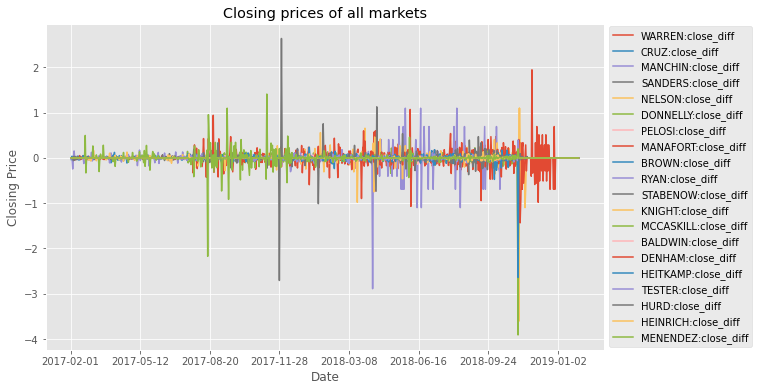

In [10]:
#Print the stationary prices.
closing_prices = feature_data.loc[:, [("close" in name) for name in feature_data.columns]]
closing_prices.plot(figsize=(10, 6))
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.title("Closing prices of all markets")
plt.legend(loc='center left', bbox_to_anchor=(1,.5))
plt.show()

In [11]:
#Replace all inf and -inf (which are in the trend_cci column) with Nan
import numpy as np
feature_data = feature_data.replace([np.inf, -np.inf, np.nan], 0)

In [12]:
#Normalize the technical features
features_to_norm = ["volume", "trend_cci", "momentum_rsi"]
cols_to_norm = [name for name in feature_data.columns if any(word in name for word in features_to_norm) ]
#feature_data[cols_to_norm] = feature_data[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

from sklearn.preprocessing import StandardScaler
feature_data[cols_to_norm] = StandardScaler().fit_transform(feature_data[cols_to_norm])

#Fill any Nan in trend CCI with zeroes. (Do this AFTER normalization)
feature_data.loc[:, [("trend_cci" in name) for name in feature_data.columns]] = feature_data.loc[:, [("trend_cci" in name) for name in feature_data.columns]].fillna(value=0)


feature_data.head()

,WARREN:close_diff,CRUZ:close_diff,MANCHIN:close_diff,SANDERS:close_diff,NELSON:close_diff,DONNELLY:close_diff,PELOSI:close_diff,MANAFORT:close_diff,BROWN:close_diff,RYAN:close_diff,...,HURD:trend_cci_diff,HURD:momentum_rsi_diff,HEINRICH:volume_diff,HEINRICH:sentiment_diff,HEINRICH:trend_cci_diff,HEINRICH:momentum_rsi_diff,MENENDEZ:volume_diff,MENENDEZ:sentiment_diff,MENENDEZ:trend_cci_diff,MENENDEZ:momentum_rsi_diff
Date,,,,,,,,,,,,,,,,,,,,,
2017-02-01,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.004094,0.007581,0.0,0.00000,-0.011833,0.005665,0.0,0.000000,-0.002344,0.005679
2017-02-02,-0.012579,-0.03774,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.004094,0.007581,0.0,0.18374,-0.011833,0.005665,0.0,-0.069845,-0.002344,0.005679
2017-02-03,-0.012739,0.03774,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.004094,0.007581,0.0,-0.39322,-0.011833,0.005665,0.0,0.044986,-0.002344,0.005679
2017-02-04,0.012739,0.00000,-0.245122,0.011696,0.0,0.0,0.0,0.0,0.0,0.0,...,0.004094,0.007581,0.0,-0.02072,-0.011833,0.005665,0.0,-0.011211,-0.002344,0.005679
2017-02-05,0.012579,0.00000,0.000000,-0.059898,0.0,0.0,0.0,0.0,0.0,0.0,...,0.004094,0.007581,0.0,0.09651,-0.011833,0.005665,0.0,0.013943,-0.002344,0.005679


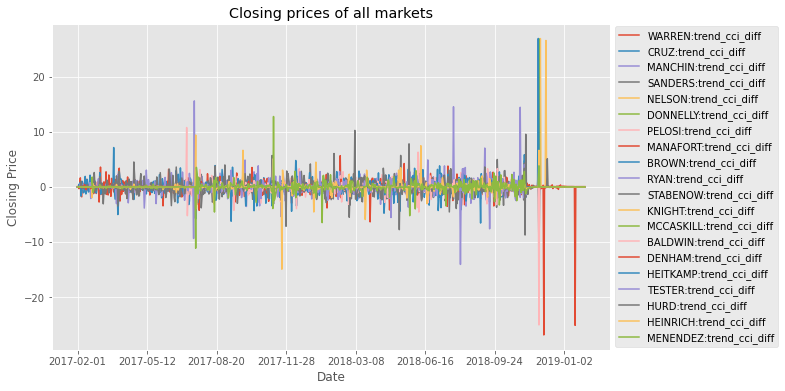

In [13]:
#Plot again
to_plot = feature_data.loc[:, [("cci" in name) for name in feature_data.columns]]
to_plot.plot(figsize=(10, 6))
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.title("Closing prices of all markets")
plt.legend(loc='center left', bbox_to_anchor=(1,.5))
plt.show()

## Split into train and test data

In [14]:
train_data = feature_data[(pd.to_datetime(feature_data.index)>= '02-01-2017') & (pd.to_datetime(feature_data.index) <= '08-01-2018')]
train_data.head(3)

,WARREN:close_diff,CRUZ:close_diff,MANCHIN:close_diff,SANDERS:close_diff,NELSON:close_diff,DONNELLY:close_diff,PELOSI:close_diff,MANAFORT:close_diff,BROWN:close_diff,RYAN:close_diff,...,HURD:trend_cci_diff,HURD:momentum_rsi_diff,HEINRICH:volume_diff,HEINRICH:sentiment_diff,HEINRICH:trend_cci_diff,HEINRICH:momentum_rsi_diff,MENENDEZ:volume_diff,MENENDEZ:sentiment_diff,MENENDEZ:trend_cci_diff,MENENDEZ:momentum_rsi_diff
Date,,,,,,,,,,,,,,,,,,,,,
2017-02-01,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.004094,0.007581,0.0,0.00000,-0.011833,0.005665,0.0,0.000000,-0.002344,0.005679
2017-02-02,-0.012579,-0.03774,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.004094,0.007581,0.0,0.18374,-0.011833,0.005665,0.0,-0.069845,-0.002344,0.005679
2017-02-03,-0.012739,0.03774,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.004094,0.007581,0.0,-0.39322,-0.011833,0.005665,0.0,0.044986,-0.002344,0.005679


In [15]:
test_data = feature_data[(pd.to_datetime(feature_data.index) >= '08-02-2018') & (pd.to_datetime(feature_data.index) <= '11-01-2018')]
test_data.head(3)

,WARREN:close_diff,CRUZ:close_diff,MANCHIN:close_diff,SANDERS:close_diff,NELSON:close_diff,DONNELLY:close_diff,PELOSI:close_diff,MANAFORT:close_diff,BROWN:close_diff,RYAN:close_diff,...,HURD:trend_cci_diff,HURD:momentum_rsi_diff,HEINRICH:volume_diff,HEINRICH:sentiment_diff,HEINRICH:trend_cci_diff,HEINRICH:momentum_rsi_diff,MENENDEZ:volume_diff,MENENDEZ:sentiment_diff,MENENDEZ:trend_cci_diff,MENENDEZ:momentum_rsi_diff
Date,,,,,,,,,,,,,,,,,,,,,
2018-08-02,0.000000,-0.028171,0.012579,0.0,-0.019048,0.108214,-0.01105,-0.344840,0.000000,0.0,...,0.608340,0.007581,0.0,0.13148,0.410237,0.005665,0.023595,0.27210,-0.674715,-0.623374
2018-08-03,0.010471,0.014185,-0.012579,0.0,0.000000,0.000000,0.00000,0.211309,0.000000,0.0,...,0.278707,-1.001663,0.0,0.11967,0.268253,0.005665,0.009295,-0.29159,-0.310229,0.005679
2018-08-04,-0.021053,0.013986,-0.038715,0.0,-0.039221,0.025318,0.00000,0.000000,0.011834,0.0,...,0.655166,0.007581,0.0,-0.38118,0.186140,0.005665,-0.049097,-0.05636,1.377321,1.035362


### Now make the "External Data Feed" objects

In [16]:
#Add "Streams" for all my external added features.
from tensortrade.data import DataFeed, Module

#Do it for train set
with Module("predictit") as train_predictit_ns:
    train_predictit_nodes = [Stream(name, list(train_data[name])) for name in train_data.columns]
    
#Now do it for test set
with Module("predictit") as test_predictit_ns:
    test_predictit_nodes = [Stream(name, list(test_data[name])) for name in test_data.columns]

In [17]:
#Then create the train Feed from it
train_external_feed = DataFeed([train_predictit_ns])
test_external_feed = DataFeed([test_predictit_ns])
train_external_feed.next()

{'predictit:/WARREN:close_diff': 0.0,
 'predictit:/CRUZ:close_diff': 0.0,
 'predictit:/MANCHIN:close_diff': 0.0,
 'predictit:/SANDERS:close_diff': 0.0,
 'predictit:/NELSON:close_diff': 0.0,
 'predictit:/DONNELLY:close_diff': 0.0,
 'predictit:/PELOSI:close_diff': 0.0,
 'predictit:/MANAFORT:close_diff': 0.0,
 'predictit:/BROWN:close_diff': 0.0,
 'predictit:/RYAN:close_diff': 0.0,
 'predictit:/STABENOW:close_diff': 0.0,
 'predictit:/KNIGHT:close_diff': 0.0,
 'predictit:/MCCASKILL:close_diff': 0.0,
 'predictit:/BALDWIN:close_diff': 0.0,
 'predictit:/DENHAM:close_diff': 0.0,
 'predictit:/HEITKAMP:close_diff': 0.0,
 'predictit:/TESTER:close_diff': 0.0,
 'predictit:/HURD:close_diff': 0.0,
 'predictit:/HEINRICH:close_diff': 0.0,
 'predictit:/MENENDEZ:close_diff': 0.0,
 'predictit:/WARREN:volume_diff': 0.0007819890389761158,
 'predictit:/WARREN:sentiment_diff': 0.0,
 'predictit:/WARREN:trend_cci_diff': -0.0048507814974368055,
 'predictit:/WARREN:momentum_rsi_diff': 0.006612971143076447,
 'predi

## First Launch Ray. 
This is where you define our training "Trading Enviroment," which includes things such as the action scheme, the reward scheme, the window size, and whether or not to use the "interal feed" (internal data feed has all the price data from the wallets and the networth of the portfolio).

In [18]:
#Add the deeptrader path to ALL workers, not just the current worker
import os
parent_dir = os.path.realpath("..")
os.environ["PYTHONPATH"] = parent_dir + ":" + os.environ.get("PYTHONPATH", "")

In [19]:
#Try and get rid of that yaml warning (although this only does it for THIS worker)
import yaml
yaml.warnings({'YAMLLoadWarning': False})

In [20]:
# Environment
from tensortrade.environments import TradingEnvironment


import gym
import ray
from ray import tune
from ray.tune import grid_search
from ray.tune.registry import register_env

import ray.rllib.agents.dqn as dqn
from ray.tune.logger import pretty_print
from tensortrade.rewards import RiskAdjustedReturns
    
class RayTradingEnv(TradingEnvironment):
    def __init__(self):        
        env = TradingEnvironment(
            feed=train_external_feed,
            portfolio=portfolio,
            action_scheme="simple",
            reward_scheme="diversified",
            window_size=15,
            enable_logger=False,
            renderers = 'screenlog',
            use_internal = False,
        ) 
        self.env = env
        self.action_space = self.env.action_space
        self.observation_space = self.env.observation_space
        
        

    def reset(self):
        return self.env.reset()

    def step(self, action):
        return self.env.step(action)

def env_creator(env_config):
    return RayTradingEnv()

register_env("ray_trading_env", env_creator)


#ray.init(ignore_reinit_error=True, local_mode=True)

## Train using Tune

In [21]:
#Implement Custom neural network model
from ray.rllib.models import ModelCatalog
from ray.rllib.models.tf.tf_modelv2 import TFModelV2
from ray.rllib.agents.dqn.distributional_q_model import DistributionalQModel
from ray.rllib.utils import try_import_tf

from ray.rllib.models.tf.fcnet_v2 import FullyConnectedNetwork

from gym.spaces import Box

tf = try_import_tf()

class CNNModel(DistributionalQModel, TFModelV2):
    """Custom model for DQN."""

    def __init__(self, obs_space, action_space, num_outputs, model_config,
                 name, **kw):
        super(CNNModel, self).__init__(
            obs_space, action_space, num_outputs, model_config, name, **kw)

        # Define neural net layers
        
        
        self.base_model = tf.keras.Sequential([
            tf.keras.layers.InputLayer(input_shape=(15, 121)),
            tf.keras.layers.Conv1D(filters=40, kernel_size=6, padding="same", activation="relu"),
            tf.keras.layers.MaxPooling1D(pool_size=2),
            tf.keras.layers.Conv1D(filters=20, kernel_size=3, padding="same", activation="relu"),
            tf.keras.layers.MaxPooling1D(pool_size=2),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(num_outputs)
        ])
        
        self.register_variables(self.base_model.variables)

    # Implement the core forward method
    def forward(self, input_dict, state, seq_lens):
        model_out = self.base_model(input_dict["obs"]["real_obs"])
        
        action_mask = input_dict["obs"]["action_mask"]
        inf_mask = tf.maximum(tf.log(action_mask), tf.float32.min)
        
        
        return model_out + inf_mask, state

    
ModelCatalog.register_custom_model("cnn_model", CNNModel)

In [22]:
# Population based training
from ray.tune.schedulers import PopulationBasedTraining
import random

pbt = PopulationBasedTraining(
    time_attr="time_total_s",
    metric="episode_reward_mean",
    mode="max",
    perturbation_interval=240, #Every 10,000 steps, consider changing learning rate
    hyperparam_mutations={
        #"lr": lambda: random.uniform(.00001, .01),
        #"epsilon_timesteps": lambda: random.uniform(10000, 100000)
        "train_batch_size": lambda: random.uniform(10, 1000),
    } 
)

In [23]:
%load_ext autoreload
%autoreload 2

In [ ]:
analysis = tune.run(
        "DQN",
        name = "DQN57-actions_mask",
        #scheduler=pbt, #Use Population Based Training
        #num_samples=4, #Number of different hyperparameters to sample
        #reuse_actors=True,
        checkpoint_freq = 50,
        checkpoint_at_end=True,
        stop={
            "timesteps_total": 10000000,
        },
        config={
            "env": "ray_trading_env",
            "lr": .0001,  # try different lrs
            "num_workers": 18,  # parallelism,
            #"num_gpus": 1,
            #"eager": "true",
            "model": {
                "custom_model": "cnn_model"
            },
            "exploration_config": {
                "initial_epsilon": 0.85,
                "epsilon_timesteps": 5000000,
                
            },
            "train_batch_size": 100,
            #"clip_rewards": True,
            #"grad_norm_clipping": None,
            "target_network_update_freq": 3000,
            "dueling": False,
            "hiddens": [],
        },
        
    )

2020-04-17 13:39:31,668	WARNING services.py:586 -- setpgrp failed, processes may not be cleaned up properly: [Errno 1] Operation not permitted.
2020-04-17 13:39:31,670	INFO resource_spec.py:212 -- Starting Ray with 27.69 GiB memory available for workers and up to 13.85 GiB for objects. You can adjust these settings with ray.init(memory=<bytes>, object_store_memory=<bytes>).
2020-04-17 13:39:32,112	INFO services.py:1078 -- View the Ray dashboard at localhost:8266
2020-04-17 13:39:32,116	WARNING services.py:1403 -- WARNING: The object store is using /tmp instead of /dev/shm because /dev/shm has only 14390095872 bytes available. This may slow down performance! You may be able to free up space by deleting files in /dev/shm or terminating any running plasma_store_server processes. If you are inside a Docker container, you may need to pass an argument with the flag '--shm-size' to 'docker run'.


Trial name,status,loc
DQN_ray_trading_env_65909dc8,RUNNING,


(pid=11241) 2020-04-17 13:39:38,163	INFO trainer.py:420 -- Tip: set 'eager': true or the --eager flag to enable TensorFlow eager execution
(pid=11241) 2020-04-17 13:39:39,961	INFO trainer.py:580 -- Current log_level is WARN. For more information, set 'log_level': 'INFO' / 'DEBUG' or use the -v and -vv flags.
(pid=11241) /home/accts/jcf73/thesis/venv/lib/python3.7/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
(pid=11241)   warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))
(pid=11241) /home/accts/jcf73/thesis/venv/lib/python3.7/site-packages/ray/rllib/utils/from_config.py:134: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
(pid=11241)   obj = yaml.load(type_)
(pid=11241) 2020-04-17 13:39:41,343	WARNING util.py:37 -- Install gputil for GPU system monitoring.
(pid=11246) /home/accts/jcf73/thesis/venv/lib/pyt

(pid=11240) /home/accts/jcf73/thesis/venv/lib/python3.7/site-packages/ray/rllib/utils/from_config.py:134: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
(pid=11240)   obj = yaml.load(type_)
(pid=11233) /home/accts/jcf73/thesis/venv/lib/python3.7/site-packages/ray/rllib/utils/from_config.py:134: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
(pid=11233)   obj = yaml.load(type_)
(pid=11238) /home/accts/jcf73/thesis/venv/lib/python3.7/site-packages/ray/rllib/utils/from_config.py:134: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
(pid=11238)   obj = yaml.load(type_)
(pid=11231) /home/accts/jcf73/thesis/venv/lib/python3.7/site-packages/ray/rllib/utils

Result for DQN_ray_trading_env_65909dc8:
  custom_metrics: {}
  date: 2020-04-17_13-40-21
  done: false
  episode_len_mean: .nan
  episode_reward_max: .nan
  episode_reward_mean: .nan
  episode_reward_min: .nan
  episodes_this_iter: 0
  episodes_total: 0
  experiment_id: ee67339f56a74b02af9415318667e217
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.8500000238418579
    - 0.8500000238418579
    - 0.8500000238418579
    - 0.8500000238418579
    - 0.8500000238418579
    - 0.8500000238418579
    - 0.8500000238418579
    - 0.8500000238418579
    - 0.8500000238418579
    - 0.8500000238418579
    - 0.8500000238418579
    - 0.8500000238418579
    - 0.8500000238418579
    - 0.8500000238418579
    - 0.8500000238418579
    - 0.8500000238418579
    - 0.8500000238418579
    - 0.8500000238418579
    grad_time_ms: .nan
    learner: {}
    num_steps_sampled: 1008
    num_steps_trained: 0
    num_target_updates: 0
    opt_peak_

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_65909dc8,RUNNING,128.36.232.26:11241,nan,39.9002,1008,1


Result for DQN_ray_trading_env_65909dc8:
  custom_metrics: {}
  date: 2020-04-17_13-40-45
  done: false
  episode_len_mean: .nan
  episode_reward_max: .nan
  episode_reward_mean: .nan
  episode_reward_min: .nan
  episodes_this_iter: 0
  episodes_total: 0
  experiment_id: ee67339f56a74b02af9415318667e217
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.8500000238418579
    - 0.8500000238418579
    - 0.8500000238418579
    - 0.8500000238418579
    - 0.8500000238418579
    - 0.8500000238418579
    - 0.8500000238418579
    - 0.8500000238418579
    - 0.8500000238418579
    - 0.8500000238418579
    - 0.8500000238418579
    - 0.8500000238418579
    - 0.8500000238418579
    - 0.8500000238418579
    - 0.8500000238418579
    - 0.8500000238418579
    - 0.8500000238418579
    - 0.8500000238418579
    grad_time_ms: 16.413
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 0.0084178708493709

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_65909dc8,RUNNING,128.36.232.26:11241,nan,64.2537,2016,2


Result for DQN_ray_trading_env_65909dc8:
  custom_metrics: {}
  date: 2020-04-17_13-41-09
  done: false
  episode_len_mean: .nan
  episode_reward_max: .nan
  episode_reward_mean: .nan
  episode_reward_min: .nan
  episodes_this_iter: 0
  episodes_total: 0
  experiment_id: ee67339f56a74b02af9415318667e217
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.8498326539993286
    - 0.8498326539993286
    - 0.8498326539993286
    - 0.8498326539993286
    - 0.8498326539993286
    - 0.8498326539993286
    - 0.8498326539993286
    - 0.8498326539993286
    - 0.8498326539993286
    - 0.8498326539993286
    - 0.8498326539993286
    - 0.8498326539993286
    - 0.8498326539993286
    - 0.8498326539993286
    - 0.8498326539993286
    - 0.8498326539993286
    - 0.8498326539993286
    - 0.8498326539993286
    grad_time_ms: 16.98
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 0.00622784160077571

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_65909dc8,RUNNING,128.36.232.26:11241,nan,88.0996,3024,3


Result for DQN_ray_trading_env_65909dc8:
  custom_metrics: {}
  date: 2020-04-17_13-41-33
  done: false
  episode_len_mean: .nan
  episode_reward_max: .nan
  episode_reward_mean: .nan
  episode_reward_min: .nan
  episodes_this_iter: 0
  episodes_total: 0
  experiment_id: ee67339f56a74b02af9415318667e217
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.8496653437614441
    - 0.8496653437614441
    - 0.8496653437614441
    - 0.8496653437614441
    - 0.8496653437614441
    - 0.8496653437614441
    - 0.8496653437614441
    - 0.8496653437614441
    - 0.8496653437614441
    - 0.8496653437614441
    - 0.8496653437614441
    - 0.8496653437614441
    - 0.8496653437614441
    - 0.8496653437614441
    - 0.8496653437614441
    - 0.8496653437614441
    - 0.8496653437614441
    - 0.8496653437614441
    grad_time_ms: 16.131
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 0.0138758262619376

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_65909dc8,RUNNING,128.36.232.26:11241,nan,112.001,4032,4


Result for DQN_ray_trading_env_65909dc8:
  custom_metrics: {}
  date: 2020-04-17_13-41-57
  done: false
  episode_len_mean: .nan
  episode_reward_max: .nan
  episode_reward_mean: .nan
  episode_reward_min: .nan
  episodes_this_iter: 0
  episodes_total: 0
  experiment_id: ee67339f56a74b02af9415318667e217
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.8494980335235596
    - 0.8494980335235596
    - 0.8494980335235596
    - 0.8494980335235596
    - 0.8494980335235596
    - 0.8494980335235596
    - 0.8494980335235596
    - 0.8494980335235596
    - 0.8494980335235596
    - 0.8494980335235596
    - 0.8494980335235596
    - 0.8494980335235596
    - 0.8494980335235596
    - 0.8494980335235596
    - 0.8494980335235596
    - 0.8494980335235596
    - 0.8494980335235596
    - 0.8494980335235596
    grad_time_ms: 16.338
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 0.0070141446776688

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_65909dc8,RUNNING,128.36.232.26:11241,nan,136.272,5040,5


Result for DQN_ray_trading_env_65909dc8:
  custom_metrics: {}
  date: 2020-04-17_13-42-23
  done: false
  episode_len_mean: .nan
  episode_reward_max: .nan
  episode_reward_mean: .nan
  episode_reward_min: .nan
  episodes_this_iter: 0
  episodes_total: 0
  experiment_id: ee67339f56a74b02af9415318667e217
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.8493306636810303
    - 0.8493306636810303
    - 0.8493306636810303
    - 0.8493306636810303
    - 0.8493306636810303
    - 0.8493306636810303
    - 0.8493306636810303
    - 0.8493306636810303
    - 0.8493306636810303
    - 0.8493306636810303
    - 0.8493306636810303
    - 0.8493306636810303
    - 0.8493306636810303
    - 0.8493306636810303
    - 0.8493306636810303
    - 0.8493306636810303
    - 0.8493306636810303
    - 0.8493306636810303
    grad_time_ms: 16.351
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 0.0178470965474843

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_65909dc8,RUNNING,128.36.232.26:11241,nan,161.659,6048,6


Result for DQN_ray_trading_env_65909dc8:
  custom_metrics: {}
  date: 2020-04-17_13-42-48
  done: false
  episode_len_mean: .nan
  episode_reward_max: .nan
  episode_reward_mean: .nan
  episode_reward_min: .nan
  episodes_this_iter: 0
  episodes_total: 0
  experiment_id: ee67339f56a74b02af9415318667e217
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.8491633534431458
    - 0.8491633534431458
    - 0.8491633534431458
    - 0.8491633534431458
    - 0.8491633534431458
    - 0.8491633534431458
    - 0.8491633534431458
    - 0.8491633534431458
    - 0.8491633534431458
    - 0.8491633534431458
    - 0.8491633534431458
    - 0.8491633534431458
    - 0.8491633534431458
    - 0.8491633534431458
    - 0.8491633534431458
    - 0.8491633534431458
    - 0.8491633534431458
    - 0.8491633534431458
    grad_time_ms: 17.424
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 0.0056425677612423

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_65909dc8,RUNNING,128.36.232.26:11241,nan,187.139,7056,7


Result for DQN_ray_trading_env_65909dc8:
  custom_metrics: {}
  date: 2020-04-17_13-43-14
  done: false
  episode_len_mean: .nan
  episode_reward_max: .nan
  episode_reward_mean: .nan
  episode_reward_min: .nan
  episodes_this_iter: 0
  episodes_total: 0
  experiment_id: ee67339f56a74b02af9415318667e217
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.8489960432052612
    - 0.8489960432052612
    - 0.8489960432052612
    - 0.8489960432052612
    - 0.8489960432052612
    - 0.8489960432052612
    - 0.8489960432052612
    - 0.8489960432052612
    - 0.8489960432052612
    - 0.8489960432052612
    - 0.8489960432052612
    - 0.8489960432052612
    - 0.8489960432052612
    - 0.8489960432052612
    - 0.8489960432052612
    - 0.8489960432052612
    - 0.8489960432052612
    - 0.8489960432052612
    grad_time_ms: 16.984
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 0.0114400768652558

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_65909dc8,RUNNING,128.36.232.26:11241,nan,212.979,8064,8


Result for DQN_ray_trading_env_65909dc8:
  custom_metrics: {}
  date: 2020-04-17_13-43-41
  done: false
  episode_len_mean: .nan
  episode_reward_max: .nan
  episode_reward_mean: .nan
  episode_reward_min: .nan
  episodes_this_iter: 0
  episodes_total: 0
  experiment_id: ee67339f56a74b02af9415318667e217
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.8488287329673767
    - 0.8488287329673767
    - 0.8488287329673767
    - 0.8488287329673767
    - 0.8488287329673767
    - 0.8488287329673767
    - 0.8488287329673767
    - 0.8488287329673767
    - 0.8488287329673767
    - 0.8488287329673767
    - 0.8488287329673767
    - 0.8488287329673767
    - 0.8488287329673767
    - 0.8488287329673767
    - 0.8488287329673767
    - 0.8488287329673767
    - 0.8488287329673767
    - 0.8488287329673767
    grad_time_ms: 16.539
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 0.0158282034099102

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_65909dc8,RUNNING,128.36.232.26:11241,nan,240.285,9072,9


Result for DQN_ray_trading_env_65909dc8:
  custom_metrics: {}
  date: 2020-04-17_13-44-11
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.08603421080577991
  episode_reward_mean: 0.005345623349605911
  episode_reward_min: -0.11919909860271807
  episodes_this_iter: 18
  episodes_total: 18
  experiment_id: ee67339f56a74b02af9415318667e217
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.8486613631248474
    - 0.8486613631248474
    - 0.8486613631248474
    - 0.8486613631248474
    - 0.8486613631248474
    - 0.8486613631248474
    - 0.8486613631248474
    - 0.8486613631248474
    - 0.8486613631248474
    - 0.8486613631248474
    - 0.8486613631248474
    - 0.8486613631248474
    - 0.8486613631248474
    - 0.8486613631248474
    - 0.8486613631248474
    - 0.8486613631248474
    - 0.8486613631248474
    - 0.8486613631248474
    grad_time_ms: 16.461
    learner:
      default_policy:
        cur_lr: 9.999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_65909dc8,RUNNING,128.36.232.26:11241,0.00534562,270.085,10080,10


Result for DQN_ray_trading_env_65909dc8:
  custom_metrics: {}
  date: 2020-04-17_13-44-39
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.08603421080577991
  episode_reward_mean: 0.005345623349605911
  episode_reward_min: -0.11919909860271807
  episodes_this_iter: 0
  episodes_total: 18
  experiment_id: ee67339f56a74b02af9415318667e217
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.8484940528869629
    - 0.8484940528869629
    - 0.8484940528869629
    - 0.8484940528869629
    - 0.8484940528869629
    - 0.8484940528869629
    - 0.8484940528869629
    - 0.8484940528869629
    - 0.8484940528869629
    - 0.8484940528869629
    - 0.8484940528869629
    - 0.8484940528869629
    - 0.8484940528869629
    - 0.8484940528869629
    - 0.8484940528869629
    - 0.8484940528869629
    - 0.8484940528869629
    - 0.8484940528869629
    grad_time_ms: 16.506
    learner:
      default_policy:
        cur_lr: 9.9999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_65909dc8,RUNNING,128.36.232.26:11241,0.00534562,297.591,11088,11


Result for DQN_ray_trading_env_65909dc8:
  custom_metrics: {}
  date: 2020-04-17_13-45-03
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.08603421080577991
  episode_reward_mean: 0.005345623349605911
  episode_reward_min: -0.11919909860271807
  episodes_this_iter: 0
  episodes_total: 18
  experiment_id: ee67339f56a74b02af9415318667e217
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.8483267426490784
    - 0.8483267426490784
    - 0.8483267426490784
    - 0.8483267426490784
    - 0.8483267426490784
    - 0.8483267426490784
    - 0.8483267426490784
    - 0.8483267426490784
    - 0.8483267426490784
    - 0.8483267426490784
    - 0.8483267426490784
    - 0.8483267426490784
    - 0.8483267426490784
    - 0.8483267426490784
    - 0.8483267426490784
    - 0.8483267426490784
    - 0.8483267426490784
    - 0.8483267426490784
    grad_time_ms: 16.541
    learner:
      default_policy:
        cur_lr: 9.9999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_65909dc8,RUNNING,128.36.232.26:11241,0.00534562,321.753,12096,12


Result for DQN_ray_trading_env_65909dc8:
  custom_metrics: {}
  date: 2020-04-17_13-45-27
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.08603421080577991
  episode_reward_mean: 0.005345623349605911
  episode_reward_min: -0.11919909860271807
  episodes_this_iter: 0
  episodes_total: 18
  experiment_id: ee67339f56a74b02af9415318667e217
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.8481593728065491
    - 0.8481593728065491
    - 0.8481593728065491
    - 0.8481593728065491
    - 0.8481593728065491
    - 0.8481593728065491
    - 0.8481593728065491
    - 0.8481593728065491
    - 0.8481593728065491
    - 0.8481593728065491
    - 0.8481593728065491
    - 0.8481593728065491
    - 0.8481593728065491
    - 0.8481593728065491
    - 0.8481593728065491
    - 0.8481593728065491
    - 0.8481593728065491
    - 0.8481593728065491
    grad_time_ms: 16.298
    learner:
      default_policy:
        cur_lr: 9.9999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_65909dc8,RUNNING,128.36.232.26:11241,0.00534562,345.558,13104,13


Result for DQN_ray_trading_env_65909dc8:
  custom_metrics: {}
  date: 2020-04-17_13-45-51
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.08603421080577991
  episode_reward_mean: 0.005345623349605911
  episode_reward_min: -0.11919909860271807
  episodes_this_iter: 0
  episodes_total: 18
  experiment_id: ee67339f56a74b02af9415318667e217
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.8479920625686646
    - 0.8479920625686646
    - 0.8479920625686646
    - 0.8479920625686646
    - 0.8479920625686646
    - 0.8479920625686646
    - 0.8479920625686646
    - 0.8479920625686646
    - 0.8479920625686646
    - 0.8479920625686646
    - 0.8479920625686646
    - 0.8479920625686646
    - 0.8479920625686646
    - 0.8479920625686646
    - 0.8479920625686646
    - 0.8479920625686646
    - 0.8479920625686646
    - 0.8479920625686646
    grad_time_ms: 16.814
    learner:
      default_policy:
        cur_lr: 9.9999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_65909dc8,RUNNING,128.36.232.26:11241,0.00534562,369.784,14112,14


Result for DQN_ray_trading_env_65909dc8:
  custom_metrics: {}
  date: 2020-04-17_13-46-16
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.08603421080577991
  episode_reward_mean: 0.005345623349605911
  episode_reward_min: -0.11919909860271807
  episodes_this_iter: 0
  episodes_total: 18
  experiment_id: ee67339f56a74b02af9415318667e217
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.84782475233078
    - 0.84782475233078
    - 0.84782475233078
    - 0.84782475233078
    - 0.84782475233078
    - 0.84782475233078
    - 0.84782475233078
    - 0.84782475233078
    - 0.84782475233078
    - 0.84782475233078
    - 0.84782475233078
    - 0.84782475233078
    - 0.84782475233078
    - 0.84782475233078
    - 0.84782475233078
    - 0.84782475233078
    - 0.84782475233078
    - 0.84782475233078
    grad_time_ms: 17.594
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 0.007

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_65909dc8,RUNNING,128.36.232.26:11241,0.00534562,394.621,15120,15


Result for DQN_ray_trading_env_65909dc8:
  custom_metrics: {}
  date: 2020-04-17_13-46-41
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.08603421080577991
  episode_reward_mean: 0.005345623349605911
  episode_reward_min: -0.11919909860271807
  episodes_this_iter: 0
  episodes_total: 18
  experiment_id: ee67339f56a74b02af9415318667e217
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.8476573824882507
    - 0.8476573824882507
    - 0.8476573824882507
    - 0.8476573824882507
    - 0.8476573824882507
    - 0.8476573824882507
    - 0.8476573824882507
    - 0.8476573824882507
    - 0.8476573824882507
    - 0.8476573824882507
    - 0.8476573824882507
    - 0.8476573824882507
    - 0.8476573824882507
    - 0.8476573824882507
    - 0.8476573824882507
    - 0.8476573824882507
    - 0.8476573824882507
    - 0.8476573824882507
    grad_time_ms: 16.302
    learner:
      default_policy:
        cur_lr: 9.9999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_65909dc8,RUNNING,128.36.232.26:11241,0.00534562,419.626,16128,16


Result for DQN_ray_trading_env_65909dc8:
  custom_metrics: {}
  date: 2020-04-17_13-47-07
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.08603421080577991
  episode_reward_mean: 0.005345623349605911
  episode_reward_min: -0.11919909860271807
  episodes_this_iter: 0
  episodes_total: 18
  experiment_id: ee67339f56a74b02af9415318667e217
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.8474900722503662
    - 0.8474900722503662
    - 0.8474900722503662
    - 0.8474900722503662
    - 0.8474900722503662
    - 0.8474900722503662
    - 0.8474900722503662
    - 0.8474900722503662
    - 0.8474900722503662
    - 0.8474900722503662
    - 0.8474900722503662
    - 0.8474900722503662
    - 0.8474900722503662
    - 0.8474900722503662
    - 0.8474900722503662
    - 0.8474900722503662
    - 0.8474900722503662
    - 0.8474900722503662
    grad_time_ms: 16.331
    learner:
      default_policy:
        cur_lr: 9.9999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_65909dc8,RUNNING,128.36.232.26:11241,0.00534562,445.202,17136,17


Result for DQN_ray_trading_env_65909dc8:
  custom_metrics: {}
  date: 2020-04-17_13-47-33
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.08603421080577991
  episode_reward_mean: 0.005345623349605911
  episode_reward_min: -0.11919909860271807
  episodes_this_iter: 0
  episodes_total: 18
  experiment_id: ee67339f56a74b02af9415318667e217
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.8473227620124817
    - 0.8473227620124817
    - 0.8473227620124817
    - 0.8473227620124817
    - 0.8473227620124817
    - 0.8473227620124817
    - 0.8473227620124817
    - 0.8473227620124817
    - 0.8473227620124817
    - 0.8473227620124817
    - 0.8473227620124817
    - 0.8473227620124817
    - 0.8473227620124817
    - 0.8473227620124817
    - 0.8473227620124817
    - 0.8473227620124817
    - 0.8473227620124817
    - 0.8473227620124817
    grad_time_ms: 16.286
    learner:
      default_policy:
        cur_lr: 9.9999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_65909dc8,RUNNING,128.36.232.26:11241,0.00534562,471.67,18144,18


Result for DQN_ray_trading_env_65909dc8:
  custom_metrics: {}
  date: 2020-04-17_13-48-01
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.08603421080577991
  episode_reward_mean: 0.005345623349605911
  episode_reward_min: -0.11919909860271807
  episodes_this_iter: 0
  episodes_total: 18
  experiment_id: ee67339f56a74b02af9415318667e217
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.8471554517745972
    - 0.8471554517745972
    - 0.8471554517745972
    - 0.8471554517745972
    - 0.8471554517745972
    - 0.8471554517745972
    - 0.8471554517745972
    - 0.8471554517745972
    - 0.8471554517745972
    - 0.8471554517745972
    - 0.8471554517745972
    - 0.8471554517745972
    - 0.8471554517745972
    - 0.8471554517745972
    - 0.8471554517745972
    - 0.8471554517745972
    - 0.8471554517745972
    - 0.8471554517745972
    grad_time_ms: 16.35
    learner:
      default_policy:
        cur_lr: 9.99999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_65909dc8,RUNNING,128.36.232.26:11241,0.00534562,499.795,19152,19


Result for DQN_ray_trading_env_65909dc8:
  custom_metrics: {}
  date: 2020-04-17_13-48-31
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.11718108547512446
  episode_reward_mean: 0.002303680430731153
  episode_reward_min: -0.15385528397952405
  episodes_this_iter: 18
  episodes_total: 36
  experiment_id: ee67339f56a74b02af9415318667e217
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.8469880819320679
    - 0.8469880819320679
    - 0.8469880819320679
    - 0.8469880819320679
    - 0.8469880819320679
    - 0.8469880819320679
    - 0.8469880819320679
    - 0.8469880819320679
    - 0.8469880819320679
    - 0.8469880819320679
    - 0.8469880819320679
    - 0.8469880819320679
    - 0.8469880819320679
    - 0.8469880819320679
    - 0.8469880819320679
    - 0.8469880819320679
    - 0.8469880819320679
    - 0.8469880819320679
    grad_time_ms: 17.002
    learner:
      default_policy:
        cur_lr: 9.999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_65909dc8,RUNNING,128.36.232.26:11241,0.00230368,529.514,20160,20


Result for DQN_ray_trading_env_65909dc8:
  custom_metrics: {}
  date: 2020-04-17_13-48-57
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.11718108547512446
  episode_reward_mean: 0.002303680430731152
  episode_reward_min: -0.15385528397952405
  episodes_this_iter: 0
  episodes_total: 36
  experiment_id: ee67339f56a74b02af9415318667e217
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.8468207716941833
    - 0.8468207716941833
    - 0.8468207716941833
    - 0.8468207716941833
    - 0.8468207716941833
    - 0.8468207716941833
    - 0.8468207716941833
    - 0.8468207716941833
    - 0.8468207716941833
    - 0.8468207716941833
    - 0.8468207716941833
    - 0.8468207716941833
    - 0.8468207716941833
    - 0.8468207716941833
    - 0.8468207716941833
    - 0.8468207716941833
    - 0.8468207716941833
    - 0.8468207716941833
    grad_time_ms: 16.572
    learner:
      default_policy:
        cur_lr: 9.9999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_65909dc8,RUNNING,128.36.232.26:11241,0.00230368,555.233,21168,21


Result for DQN_ray_trading_env_65909dc8:
  custom_metrics: {}
  date: 2020-04-17_13-49-20
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.11718108547512446
  episode_reward_mean: 0.002303680430731152
  episode_reward_min: -0.15385528397952405
  episodes_this_iter: 0
  episodes_total: 36
  experiment_id: ee67339f56a74b02af9415318667e217
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.8466534614562988
    - 0.8466534614562988
    - 0.8466534614562988
    - 0.8466534614562988
    - 0.8466534614562988
    - 0.8466534614562988
    - 0.8466534614562988
    - 0.8466534614562988
    - 0.8466534614562988
    - 0.8466534614562988
    - 0.8466534614562988
    - 0.8466534614562988
    - 0.8466534614562988
    - 0.8466534614562988
    - 0.8466534614562988
    - 0.8466534614562988
    - 0.8466534614562988
    - 0.8466534614562988
    grad_time_ms: 17.046
    learner:
      default_policy:
        cur_lr: 9.9999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_65909dc8,RUNNING,128.36.232.26:11241,0.00230368,578.772,22176,22


Result for DQN_ray_trading_env_65909dc8:
  custom_metrics: {}
  date: 2020-04-17_13-49-44
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.11718108547512446
  episode_reward_mean: 0.002303680430731152
  episode_reward_min: -0.15385528397952405
  episodes_this_iter: 0
  episodes_total: 36
  experiment_id: ee67339f56a74b02af9415318667e217
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.8464860916137695
    - 0.8464860916137695
    - 0.8464860916137695
    - 0.8464860916137695
    - 0.8464860916137695
    - 0.8464860916137695
    - 0.8464860916137695
    - 0.8464860916137695
    - 0.8464860916137695
    - 0.8464860916137695
    - 0.8464860916137695
    - 0.8464860916137695
    - 0.8464860916137695
    - 0.8464860916137695
    - 0.8464860916137695
    - 0.8464860916137695
    - 0.8464860916137695
    - 0.8464860916137695
    grad_time_ms: 16.788
    learner:
      default_policy:
        cur_lr: 9.9999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_65909dc8,RUNNING,128.36.232.26:11241,0.00230368,602.471,23184,23


Result for DQN_ray_trading_env_65909dc8:
  custom_metrics: {}
  date: 2020-04-17_13-50-09
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.11718108547512446
  episode_reward_mean: 0.002303680430731152
  episode_reward_min: -0.15385528397952405
  episodes_this_iter: 0
  episodes_total: 36
  experiment_id: ee67339f56a74b02af9415318667e217
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.846318781375885
    - 0.846318781375885
    - 0.846318781375885
    - 0.846318781375885
    - 0.846318781375885
    - 0.846318781375885
    - 0.846318781375885
    - 0.846318781375885
    - 0.846318781375885
    - 0.846318781375885
    - 0.846318781375885
    - 0.846318781375885
    - 0.846318781375885
    - 0.846318781375885
    - 0.846318781375885
    - 0.846318781375885
    - 0.846318781375885
    - 0.846318781375885
    grad_time_ms: 16.585
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
  

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_65909dc8,RUNNING,128.36.232.26:11241,0.00230368,627.33,24192,24


Result for DQN_ray_trading_env_65909dc8:
  custom_metrics: {}
  date: 2020-04-17_13-50-34
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.11718108547512446
  episode_reward_mean: 0.002303680430731152
  episode_reward_min: -0.15385528397952405
  episodes_this_iter: 0
  episodes_total: 36
  experiment_id: ee67339f56a74b02af9415318667e217
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.8461514711380005
    - 0.8461514711380005
    - 0.8461514711380005
    - 0.8461514711380005
    - 0.8461514711380005
    - 0.8461514711380005
    - 0.8461514711380005
    - 0.8461514711380005
    - 0.8461514711380005
    - 0.8461514711380005
    - 0.8461514711380005
    - 0.8461514711380005
    - 0.8461514711380005
    - 0.8461514711380005
    - 0.8461514711380005
    - 0.8461514711380005
    - 0.8461514711380005
    - 0.8461514711380005
    grad_time_ms: 16.254
    learner:
      default_policy:
        cur_lr: 9.9999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_65909dc8,RUNNING,128.36.232.26:11241,0.00230368,652.702,25200,25


Result for DQN_ray_trading_env_65909dc8:
  custom_metrics: {}
  date: 2020-04-17_13-51-00
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.11718108547512446
  episode_reward_mean: 0.002303680430731152
  episode_reward_min: -0.15385528397952405
  episodes_this_iter: 0
  episodes_total: 36
  experiment_id: ee67339f56a74b02af9415318667e217
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.8459841012954712
    - 0.8459841012954712
    - 0.8459841012954712
    - 0.8459841012954712
    - 0.8459841012954712
    - 0.8459841012954712
    - 0.8459841012954712
    - 0.8459841012954712
    - 0.8459841012954712
    - 0.8459841012954712
    - 0.8459841012954712
    - 0.8459841012954712
    - 0.8459841012954712
    - 0.8459841012954712
    - 0.8459841012954712
    - 0.8459841012954712
    - 0.8459841012954712
    - 0.8459841012954712
    grad_time_ms: 16.644
    learner:
      default_policy:
        cur_lr: 9.9999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_65909dc8,RUNNING,128.36.232.26:11241,0.00230368,678.494,26208,26


Result for DQN_ray_trading_env_65909dc8:
  custom_metrics: {}
  date: 2020-04-17_13-51-27
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.11718108547512446
  episode_reward_mean: 0.002303680430731152
  episode_reward_min: -0.15385528397952405
  episodes_this_iter: 0
  episodes_total: 36
  experiment_id: ee67339f56a74b02af9415318667e217
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.8458167910575867
    - 0.8458167910575867
    - 0.8458167910575867
    - 0.8458167910575867
    - 0.8458167910575867
    - 0.8458167910575867
    - 0.8458167910575867
    - 0.8458167910575867
    - 0.8458167910575867
    - 0.8458167910575867
    - 0.8458167910575867
    - 0.8458167910575867
    - 0.8458167910575867
    - 0.8458167910575867
    - 0.8458167910575867
    - 0.8458167910575867
    - 0.8458167910575867
    - 0.8458167910575867
    grad_time_ms: 17.387
    learner:
      default_policy:
        cur_lr: 9.9999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_65909dc8,RUNNING,128.36.232.26:11241,0.00230368,705.205,27216,27


Result for DQN_ray_trading_env_65909dc8:
  custom_metrics: {}
  date: 2020-04-17_13-51-55
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.11718108547512446
  episode_reward_mean: 0.002303680430731152
  episode_reward_min: -0.15385528397952405
  episodes_this_iter: 0
  episodes_total: 36
  experiment_id: ee67339f56a74b02af9415318667e217
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.8456494808197021
    - 0.8456494808197021
    - 0.8456494808197021
    - 0.8456494808197021
    - 0.8456494808197021
    - 0.8456494808197021
    - 0.8456494808197021
    - 0.8456494808197021
    - 0.8456494808197021
    - 0.8456494808197021
    - 0.8456494808197021
    - 0.8456494808197021
    - 0.8456494808197021
    - 0.8456494808197021
    - 0.8456494808197021
    - 0.8456494808197021
    - 0.8456494808197021
    - 0.8456494808197021
    grad_time_ms: 16.323
    learner:
      default_policy:
        cur_lr: 9.9999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_65909dc8,RUNNING,128.36.232.26:11241,0.00230368,733.317,28224,28


Result for DQN_ray_trading_env_65909dc8:
  custom_metrics: {}
  date: 2020-04-17_13-52-23
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.11718108547512446
  episode_reward_mean: 0.002303680430731152
  episode_reward_min: -0.15385528397952405
  episodes_this_iter: 0
  episodes_total: 36
  experiment_id: ee67339f56a74b02af9415318667e217
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.8454821705818176
    - 0.8454821705818176
    - 0.8454821705818176
    - 0.8454821705818176
    - 0.8454821705818176
    - 0.8454821705818176
    - 0.8454821705818176
    - 0.8454821705818176
    - 0.8454821705818176
    - 0.8454821705818176
    - 0.8454821705818176
    - 0.8454821705818176
    - 0.8454821705818176
    - 0.8454821705818176
    - 0.8454821705818176
    - 0.8454821705818176
    - 0.8454821705818176
    - 0.8454821705818176
    grad_time_ms: 16.452
    learner:
      default_policy:
        cur_lr: 9.9999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_65909dc8,RUNNING,128.36.232.26:11241,0.00230368,761.522,29232,29


Result for DQN_ray_trading_env_65909dc8:
  custom_metrics: {}
  date: 2020-04-17_13-52-53
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.12775233641527398
  episode_reward_mean: 0.004090452787520293
  episode_reward_min: -0.15385528397952405
  episodes_this_iter: 18
  episodes_total: 54
  experiment_id: ee67339f56a74b02af9415318667e217
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.8453148007392883
    - 0.8453148007392883
    - 0.8453148007392883
    - 0.8453148007392883
    - 0.8453148007392883
    - 0.8453148007392883
    - 0.8453148007392883
    - 0.8453148007392883
    - 0.8453148007392883
    - 0.8453148007392883
    - 0.8453148007392883
    - 0.8453148007392883
    - 0.8453148007392883
    - 0.8453148007392883
    - 0.8453148007392883
    - 0.8453148007392883
    - 0.8453148007392883
    - 0.8453148007392883
    grad_time_ms: 17.251
    learner:
      default_policy:
        cur_lr: 9.999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_65909dc8,RUNNING,128.36.232.26:11241,0.00409045,791.177,30240,30


Result for DQN_ray_trading_env_65909dc8:
  custom_metrics: {}
  date: 2020-04-17_13-53-19
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.12775233641527398
  episode_reward_mean: 0.004090452787520293
  episode_reward_min: -0.15385528397952405
  episodes_this_iter: 0
  episodes_total: 54
  experiment_id: ee67339f56a74b02af9415318667e217
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.8451474905014038
    - 0.8451474905014038
    - 0.8451474905014038
    - 0.8451474905014038
    - 0.8451474905014038
    - 0.8451474905014038
    - 0.8451474905014038
    - 0.8451474905014038
    - 0.8451474905014038
    - 0.8451474905014038
    - 0.8451474905014038
    - 0.8451474905014038
    - 0.8451474905014038
    - 0.8451474905014038
    - 0.8451474905014038
    - 0.8451474905014038
    - 0.8451474905014038
    - 0.8451474905014038
    grad_time_ms: 16.421
    learner:
      default_policy:
        cur_lr: 9.9999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_65909dc8,RUNNING,128.36.232.26:11241,0.00409045,817.439,31248,31


Result for DQN_ray_trading_env_65909dc8:
  custom_metrics: {}
  date: 2020-04-17_13-53-45
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.12775233641527398
  episode_reward_mean: 0.004090452787520293
  episode_reward_min: -0.15385528397952405
  episodes_this_iter: 0
  episodes_total: 54
  experiment_id: ee67339f56a74b02af9415318667e217
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.8449801802635193
    - 0.8449801802635193
    - 0.8449801802635193
    - 0.8449801802635193
    - 0.8449801802635193
    - 0.8449801802635193
    - 0.8449801802635193
    - 0.8449801802635193
    - 0.8449801802635193
    - 0.8449801802635193
    - 0.8449801802635193
    - 0.8449801802635193
    - 0.8449801802635193
    - 0.8449801802635193
    - 0.8449801802635193
    - 0.8449801802635193
    - 0.8449801802635193
    - 0.8449801802635193
    grad_time_ms: 16.835
    learner:
      default_policy:
        cur_lr: 9.9999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_65909dc8,RUNNING,128.36.232.26:11241,0.00409045,842.858,32256,32


Result for DQN_ray_trading_env_65909dc8:
  custom_metrics: {}
  date: 2020-04-17_13-54-10
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.12775233641527398
  episode_reward_mean: 0.004090452787520293
  episode_reward_min: -0.15385528397952405
  episodes_this_iter: 0
  episodes_total: 54
  experiment_id: ee67339f56a74b02af9415318667e217
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.84481281042099
    - 0.84481281042099
    - 0.84481281042099
    - 0.84481281042099
    - 0.84481281042099
    - 0.84481281042099
    - 0.84481281042099
    - 0.84481281042099
    - 0.84481281042099
    - 0.84481281042099
    - 0.84481281042099
    - 0.84481281042099
    - 0.84481281042099
    - 0.84481281042099
    - 0.84481281042099
    - 0.84481281042099
    - 0.84481281042099
    - 0.84481281042099
    grad_time_ms: 17.358
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 0.009

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_65909dc8,RUNNING,128.36.232.26:11241,0.00409045,868.45,33264,33


Result for DQN_ray_trading_env_65909dc8:
  custom_metrics: {}
  date: 2020-04-17_13-54-35
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.12775233641527398
  episode_reward_mean: 0.004090452787520293
  episode_reward_min: -0.15385528397952405
  episodes_this_iter: 0
  episodes_total: 54
  experiment_id: ee67339f56a74b02af9415318667e217
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.8446455001831055
    - 0.8446455001831055
    - 0.8446455001831055
    - 0.8446455001831055
    - 0.8446455001831055
    - 0.8446455001831055
    - 0.8446455001831055
    - 0.8446455001831055
    - 0.8446455001831055
    - 0.8446455001831055
    - 0.8446455001831055
    - 0.8446455001831055
    - 0.8446455001831055
    - 0.8446455001831055
    - 0.8446455001831055
    - 0.8446455001831055
    - 0.8446455001831055
    - 0.8446455001831055
    grad_time_ms: 17.072
    learner:
      default_policy:
        cur_lr: 9.9999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_65909dc8,RUNNING,128.36.232.26:11241,0.00409045,893.531,34272,34


Result for DQN_ray_trading_env_65909dc8:
  custom_metrics: {}
  date: 2020-04-17_13-55-01
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.12775233641527398
  episode_reward_mean: 0.004090452787520293
  episode_reward_min: -0.15385528397952405
  episodes_this_iter: 0
  episodes_total: 54
  experiment_id: ee67339f56a74b02af9415318667e217
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.844478189945221
    - 0.844478189945221
    - 0.844478189945221
    - 0.844478189945221
    - 0.844478189945221
    - 0.844478189945221
    - 0.844478189945221
    - 0.844478189945221
    - 0.844478189945221
    - 0.844478189945221
    - 0.844478189945221
    - 0.844478189945221
    - 0.844478189945221
    - 0.844478189945221
    - 0.844478189945221
    - 0.844478189945221
    - 0.844478189945221
    - 0.844478189945221
    grad_time_ms: 16.628
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
  

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_65909dc8,RUNNING,128.36.232.26:11241,0.00409045,919.352,35280,35


Result for DQN_ray_trading_env_65909dc8:
  custom_metrics: {}
  date: 2020-04-17_13-55-28
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.12775233641527398
  episode_reward_mean: 0.004090452787520293
  episode_reward_min: -0.15385528397952405
  episodes_this_iter: 0
  episodes_total: 54
  experiment_id: ee67339f56a74b02af9415318667e217
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.8443108201026917
    - 0.8443108201026917
    - 0.8443108201026917
    - 0.8443108201026917
    - 0.8443108201026917
    - 0.8443108201026917
    - 0.8443108201026917
    - 0.8443108201026917
    - 0.8443108201026917
    - 0.8443108201026917
    - 0.8443108201026917
    - 0.8443108201026917
    - 0.8443108201026917
    - 0.8443108201026917
    - 0.8443108201026917
    - 0.8443108201026917
    - 0.8443108201026917
    - 0.8443108201026917
    grad_time_ms: 16.863
    learner:
      default_policy:
        cur_lr: 9.9999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_65909dc8,RUNNING,128.36.232.26:11241,0.00409045,946.315,36288,36


Result for DQN_ray_trading_env_65909dc8:
  custom_metrics: {}
  date: 2020-04-17_13-55-56
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.12775233641527398
  episode_reward_mean: 0.004090452787520293
  episode_reward_min: -0.15385528397952405
  episodes_this_iter: 0
  episodes_total: 54
  experiment_id: ee67339f56a74b02af9415318667e217
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.8441435098648071
    - 0.8441435098648071
    - 0.8441435098648071
    - 0.8441435098648071
    - 0.8441435098648071
    - 0.8441435098648071
    - 0.8441435098648071
    - 0.8441435098648071
    - 0.8441435098648071
    - 0.8441435098648071
    - 0.8441435098648071
    - 0.8441435098648071
    - 0.8441435098648071
    - 0.8441435098648071
    - 0.8441435098648071
    - 0.8441435098648071
    - 0.8441435098648071
    - 0.8441435098648071
    grad_time_ms: 16.747
    learner:
      default_policy:
        cur_lr: 9.9999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_65909dc8,RUNNING,128.36.232.26:11241,0.00409045,973.595,37296,37


Result for DQN_ray_trading_env_65909dc8:
  custom_metrics: {}
  date: 2020-04-17_13-56-24
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.12775233641527398
  episode_reward_mean: 0.004090452787520293
  episode_reward_min: -0.15385528397952405
  episodes_this_iter: 0
  episodes_total: 54
  experiment_id: ee67339f56a74b02af9415318667e217
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.8439761996269226
    - 0.8439761996269226
    - 0.8439761996269226
    - 0.8439761996269226
    - 0.8439761996269226
    - 0.8439761996269226
    - 0.8439761996269226
    - 0.8439761996269226
    - 0.8439761996269226
    - 0.8439761996269226
    - 0.8439761996269226
    - 0.8439761996269226
    - 0.8439761996269226
    - 0.8439761996269226
    - 0.8439761996269226
    - 0.8439761996269226
    - 0.8439761996269226
    - 0.8439761996269226
    grad_time_ms: 16.928
    learner:
      default_policy:
        cur_lr: 9.9999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_65909dc8,RUNNING,128.36.232.26:11241,0.00409045,1001.77,38304,38


Result for DQN_ray_trading_env_65909dc8:
  custom_metrics: {}
  date: 2020-04-17_13-56-52
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.12775233641527398
  episode_reward_mean: 0.005895920222132842
  episode_reward_min: -0.15385528397952405
  episodes_this_iter: 18
  episodes_total: 72
  experiment_id: ee67339f56a74b02af9415318667e217
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.8438088893890381
    - 0.8438088893890381
    - 0.8438088893890381
    - 0.8438088893890381
    - 0.8438088893890381
    - 0.8438088893890381
    - 0.8438088893890381
    - 0.8438088893890381
    - 0.8438088893890381
    - 0.8438088893890381
    - 0.8438088893890381
    - 0.8438088893890381
    - 0.8438088893890381
    - 0.8438088893890381
    - 0.8438088893890381
    - 0.8438088893890381
    - 0.8438088893890381
    - 0.8438088893890381
    grad_time_ms: 17.478
    learner:
      default_policy:
        cur_lr: 9.999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_65909dc8,RUNNING,128.36.232.26:11241,0.00589592,1029.8,39312,39


Result for DQN_ray_trading_env_65909dc8:
  custom_metrics: {}
  date: 2020-04-17_13-57-22
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.12775233641527398
  episode_reward_mean: 0.005895920222132842
  episode_reward_min: -0.15385528397952405
  episodes_this_iter: 0
  episodes_total: 72
  experiment_id: ee67339f56a74b02af9415318667e217
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.8436415195465088
    - 0.8436415195465088
    - 0.8436415195465088
    - 0.8436415195465088
    - 0.8436415195465088
    - 0.8436415195465088
    - 0.8436415195465088
    - 0.8436415195465088
    - 0.8436415195465088
    - 0.8436415195465088
    - 0.8436415195465088
    - 0.8436415195465088
    - 0.8436415195465088
    - 0.8436415195465088
    - 0.8436415195465088
    - 0.8436415195465088
    - 0.8436415195465088
    - 0.8436415195465088
    grad_time_ms: 16.734
    learner:
      default_policy:
        cur_lr: 9.9999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_65909dc8,RUNNING,128.36.232.26:11241,0.00589592,1060.29,40320,40


Result for DQN_ray_trading_env_65909dc8:
  custom_metrics: {}
  date: 2020-04-17_13-57-49
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.12775233641527398
  episode_reward_mean: 0.005895920222132842
  episode_reward_min: -0.15385528397952405
  episodes_this_iter: 0
  episodes_total: 72
  experiment_id: ee67339f56a74b02af9415318667e217
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.8434742093086243
    - 0.8434742093086243
    - 0.8434742093086243
    - 0.8434742093086243
    - 0.8434742093086243
    - 0.8434742093086243
    - 0.8434742093086243
    - 0.8434742093086243
    - 0.8434742093086243
    - 0.8434742093086243
    - 0.8434742093086243
    - 0.8434742093086243
    - 0.8434742093086243
    - 0.8434742093086243
    - 0.8434742093086243
    - 0.8434742093086243
    - 0.8434742093086243
    - 0.8434742093086243
    grad_time_ms: 16.716
    learner:
      default_policy:
        cur_lr: 9.9999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_65909dc8,RUNNING,128.36.232.26:11241,0.00589592,1087.13,41328,41


Result for DQN_ray_trading_env_65909dc8:
  custom_metrics: {}
  date: 2020-04-17_13-58-15
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.12775233641527398
  episode_reward_mean: 0.005895920222132842
  episode_reward_min: -0.15385528397952405
  episodes_this_iter: 0
  episodes_total: 72
  experiment_id: ee67339f56a74b02af9415318667e217
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.8433068990707397
    - 0.8433068990707397
    - 0.8433068990707397
    - 0.8433068990707397
    - 0.8433068990707397
    - 0.8433068990707397
    - 0.8433068990707397
    - 0.8433068990707397
    - 0.8433068990707397
    - 0.8433068990707397
    - 0.8433068990707397
    - 0.8433068990707397
    - 0.8433068990707397
    - 0.8433068990707397
    - 0.8433068990707397
    - 0.8433068990707397
    - 0.8433068990707397
    - 0.8433068990707397
    grad_time_ms: 16.575
    learner:
      default_policy:
        cur_lr: 9.9999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_65909dc8,RUNNING,128.36.232.26:11241,0.00589592,1112.92,42336,42


Result for DQN_ray_trading_env_65909dc8:
  custom_metrics: {}
  date: 2020-04-17_13-58-41
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.12775233641527398
  episode_reward_mean: 0.005895920222132842
  episode_reward_min: -0.15385528397952405
  episodes_this_iter: 0
  episodes_total: 72
  experiment_id: ee67339f56a74b02af9415318667e217
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.8431395292282104
    - 0.8431395292282104
    - 0.8431395292282104
    - 0.8431395292282104
    - 0.8431395292282104
    - 0.8431395292282104
    - 0.8431395292282104
    - 0.8431395292282104
    - 0.8431395292282104
    - 0.8431395292282104
    - 0.8431395292282104
    - 0.8431395292282104
    - 0.8431395292282104
    - 0.8431395292282104
    - 0.8431395292282104
    - 0.8431395292282104
    - 0.8431395292282104
    - 0.8431395292282104
    grad_time_ms: 16.791
    learner:
      default_policy:
        cur_lr: 9.9999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_65909dc8,RUNNING,128.36.232.26:11241,0.00589592,1138.96,43344,43


Result for DQN_ray_trading_env_65909dc8:
  custom_metrics: {}
  date: 2020-04-17_13-59-06
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.12775233641527398
  episode_reward_mean: 0.005895920222132842
  episode_reward_min: -0.15385528397952405
  episodes_this_iter: 0
  episodes_total: 72
  experiment_id: ee67339f56a74b02af9415318667e217
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.8429722189903259
    - 0.8429722189903259
    - 0.8429722189903259
    - 0.8429722189903259
    - 0.8429722189903259
    - 0.8429722189903259
    - 0.8429722189903259
    - 0.8429722189903259
    - 0.8429722189903259
    - 0.8429722189903259
    - 0.8429722189903259
    - 0.8429722189903259
    - 0.8429722189903259
    - 0.8429722189903259
    - 0.8429722189903259
    - 0.8429722189903259
    - 0.8429722189903259
    - 0.8429722189903259
    grad_time_ms: 16.691
    learner:
      default_policy:
        cur_lr: 9.9999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_65909dc8,RUNNING,128.36.232.26:11241,0.00589592,1164.37,44352,44


Result for DQN_ray_trading_env_65909dc8:
  custom_metrics: {}
  date: 2020-04-17_13-59-33
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.12775233641527398
  episode_reward_mean: 0.005895920222132842
  episode_reward_min: -0.15385528397952405
  episodes_this_iter: 0
  episodes_total: 72
  experiment_id: ee67339f56a74b02af9415318667e217
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.8428049087524414
    - 0.8428049087524414
    - 0.8428049087524414
    - 0.8428049087524414
    - 0.8428049087524414
    - 0.8428049087524414
    - 0.8428049087524414
    - 0.8428049087524414
    - 0.8428049087524414
    - 0.8428049087524414
    - 0.8428049087524414
    - 0.8428049087524414
    - 0.8428049087524414
    - 0.8428049087524414
    - 0.8428049087524414
    - 0.8428049087524414
    - 0.8428049087524414
    - 0.8428049087524414
    grad_time_ms: 16.472
    learner:
      default_policy:
        cur_lr: 9.9999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_65909dc8,RUNNING,128.36.232.26:11241,0.00589592,1190.98,45360,45


Result for DQN_ray_trading_env_65909dc8:
  custom_metrics: {}
  date: 2020-04-17_14-00-00
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.12775233641527398
  episode_reward_mean: 0.005895920222132842
  episode_reward_min: -0.15385528397952405
  episodes_this_iter: 0
  episodes_total: 72
  experiment_id: ee67339f56a74b02af9415318667e217
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.8426375389099121
    - 0.8426375389099121
    - 0.8426375389099121
    - 0.8426375389099121
    - 0.8426375389099121
    - 0.8426375389099121
    - 0.8426375389099121
    - 0.8426375389099121
    - 0.8426375389099121
    - 0.8426375389099121
    - 0.8426375389099121
    - 0.8426375389099121
    - 0.8426375389099121
    - 0.8426375389099121
    - 0.8426375389099121
    - 0.8426375389099121
    - 0.8426375389099121
    - 0.8426375389099121
    grad_time_ms: 16.782
    learner:
      default_policy:
        cur_lr: 9.9999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_65909dc8,RUNNING,128.36.232.26:11241,0.00589592,1217.39,46368,46


Result for DQN_ray_trading_env_65909dc8:
  custom_metrics: {}
  date: 2020-04-17_14-00-29
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.12775233641527398
  episode_reward_mean: 0.005895920222132842
  episode_reward_min: -0.15385528397952405
  episodes_this_iter: 0
  episodes_total: 72
  experiment_id: ee67339f56a74b02af9415318667e217
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.8424702286720276
    - 0.8424702286720276
    - 0.8424702286720276
    - 0.8424702286720276
    - 0.8424702286720276
    - 0.8424702286720276
    - 0.8424702286720276
    - 0.8424702286720276
    - 0.8424702286720276
    - 0.8424702286720276
    - 0.8424702286720276
    - 0.8424702286720276
    - 0.8424702286720276
    - 0.8424702286720276
    - 0.8424702286720276
    - 0.8424702286720276
    - 0.8424702286720276
    - 0.8424702286720276
    grad_time_ms: 16.643
    learner:
      default_policy:
        cur_lr: 9.9999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_65909dc8,RUNNING,128.36.232.26:11241,0.00589592,1246.42,47376,47


Result for DQN_ray_trading_env_65909dc8:
  custom_metrics: {}
  date: 2020-04-17_14-00-59
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.12775233641527398
  episode_reward_mean: 0.005895920222132842
  episode_reward_min: -0.15385528397952405
  episodes_this_iter: 0
  episodes_total: 72
  experiment_id: ee67339f56a74b02af9415318667e217
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.8423029184341431
    - 0.8423029184341431
    - 0.8423029184341431
    - 0.8423029184341431
    - 0.8423029184341431
    - 0.8423029184341431
    - 0.8423029184341431
    - 0.8423029184341431
    - 0.8423029184341431
    - 0.8423029184341431
    - 0.8423029184341431
    - 0.8423029184341431
    - 0.8423029184341431
    - 0.8423029184341431
    - 0.8423029184341431
    - 0.8423029184341431
    - 0.8423029184341431
    - 0.8423029184341431
    grad_time_ms: 16.337
    learner:
      default_policy:
        cur_lr: 9.9999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_65909dc8,RUNNING,128.36.232.26:11241,0.00589592,1276.32,48384,48


Result for DQN_ray_trading_env_65909dc8:
  custom_metrics: {}
  date: 2020-04-17_14-01-29
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.19779928727776896
  episode_reward_mean: 0.007014223753076985
  episode_reward_min: -0.15385528397952405
  episodes_this_iter: 18
  episodes_total: 90
  experiment_id: ee67339f56a74b02af9415318667e217
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.8421356081962585
    - 0.8421356081962585
    - 0.8421356081962585
    - 0.8421356081962585
    - 0.8421356081962585
    - 0.8421356081962585
    - 0.8421356081962585
    - 0.8421356081962585
    - 0.8421356081962585
    - 0.8421356081962585
    - 0.8421356081962585
    - 0.8421356081962585
    - 0.8421356081962585
    - 0.8421356081962585
    - 0.8421356081962585
    - 0.8421356081962585
    - 0.8421356081962585
    - 0.8421356081962585
    grad_time_ms: 17.088
    learner:
      default_policy:
        cur_lr: 9.999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_65909dc8,RUNNING,128.36.232.26:11241,0.00701422,1306.25,49392,49


Result for DQN_ray_trading_env_65909dc8:
  custom_metrics: {}
  date: 2020-04-17_14-01-53
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.19779928727776896
  episode_reward_mean: 0.007014223753076984
  episode_reward_min: -0.15385528397952405
  episodes_this_iter: 0
  episodes_total: 90
  experiment_id: ee67339f56a74b02af9415318667e217
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.8419682383537292
    - 0.8419682383537292
    - 0.8419682383537292
    - 0.8419682383537292
    - 0.8419682383537292
    - 0.8419682383537292
    - 0.8419682383537292
    - 0.8419682383537292
    - 0.8419682383537292
    - 0.8419682383537292
    - 0.8419682383537292
    - 0.8419682383537292
    - 0.8419682383537292
    - 0.8419682383537292
    - 0.8419682383537292
    - 0.8419682383537292
    - 0.8419682383537292
    - 0.8419682383537292
    grad_time_ms: 16.656
    learner:
      default_policy:
        cur_lr: 9.9999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_65909dc8,RUNNING,128.36.232.26:11241,0.00701422,1330.82,50400,50


Result for DQN_ray_trading_env_65909dc8:
  custom_metrics: {}
  date: 2020-04-17_14-02-12
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.19779928727776896
  episode_reward_mean: 0.007014223753076984
  episode_reward_min: -0.15385528397952405
  episodes_this_iter: 0
  episodes_total: 90
  experiment_id: ee67339f56a74b02af9415318667e217
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.8418009281158447
    - 0.8418009281158447
    - 0.8418009281158447
    - 0.8418009281158447
    - 0.8418009281158447
    - 0.8418009281158447
    - 0.8418009281158447
    - 0.8418009281158447
    - 0.8418009281158447
    - 0.8418009281158447
    - 0.8418009281158447
    - 0.8418009281158447
    - 0.8418009281158447
    - 0.8418009281158447
    - 0.8418009281158447
    - 0.8418009281158447
    - 0.8418009281158447
    - 0.8418009281158447
    grad_time_ms: 16.491
    learner:
      default_policy:
        cur_lr: 9.9999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_65909dc8,RUNNING,128.36.232.26:11241,0.00701422,1349.48,51408,51


Result for DQN_ray_trading_env_65909dc8:
  custom_metrics: {}
  date: 2020-04-17_14-02-31
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.19779928727776896
  episode_reward_mean: 0.007014223753076984
  episode_reward_min: -0.15385528397952405
  episodes_this_iter: 0
  episodes_total: 90
  experiment_id: ee67339f56a74b02af9415318667e217
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.8416336178779602
    - 0.8416336178779602
    - 0.8416336178779602
    - 0.8416336178779602
    - 0.8416336178779602
    - 0.8416336178779602
    - 0.8416336178779602
    - 0.8416336178779602
    - 0.8416336178779602
    - 0.8416336178779602
    - 0.8416336178779602
    - 0.8416336178779602
    - 0.8416336178779602
    - 0.8416336178779602
    - 0.8416336178779602
    - 0.8416336178779602
    - 0.8416336178779602
    - 0.8416336178779602
    grad_time_ms: 16.986
    learner:
      default_policy:
        cur_lr: 9.9999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_65909dc8,RUNNING,128.36.232.26:11241,0.00701422,1368.61,52416,52


Result for DQN_ray_trading_env_65909dc8:
  custom_metrics: {}
  date: 2020-04-17_14-02-51
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.19779928727776896
  episode_reward_mean: 0.007014223753076984
  episode_reward_min: -0.15385528397952405
  episodes_this_iter: 0
  episodes_total: 90
  experiment_id: ee67339f56a74b02af9415318667e217
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.8414662480354309
    - 0.8414662480354309
    - 0.8414662480354309
    - 0.8414662480354309
    - 0.8414662480354309
    - 0.8414662480354309
    - 0.8414662480354309
    - 0.8414662480354309
    - 0.8414662480354309
    - 0.8414662480354309
    - 0.8414662480354309
    - 0.8414662480354309
    - 0.8414662480354309
    - 0.8414662480354309
    - 0.8414662480354309
    - 0.8414662480354309
    - 0.8414662480354309
    - 0.8414662480354309
    grad_time_ms: 16.486
    learner:
      default_policy:
        cur_lr: 9.9999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_65909dc8,RUNNING,128.36.232.26:11241,0.00701422,1388.24,53424,53


Result for DQN_ray_trading_env_65909dc8:
  custom_metrics: {}
  date: 2020-04-17_14-03-10
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.19779928727776896
  episode_reward_mean: 0.007014223753076984
  episode_reward_min: -0.15385528397952405
  episodes_this_iter: 0
  episodes_total: 90
  experiment_id: ee67339f56a74b02af9415318667e217
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.8412989377975464
    - 0.8412989377975464
    - 0.8412989377975464
    - 0.8412989377975464
    - 0.8412989377975464
    - 0.8412989377975464
    - 0.8412989377975464
    - 0.8412989377975464
    - 0.8412989377975464
    - 0.8412989377975464
    - 0.8412989377975464
    - 0.8412989377975464
    - 0.8412989377975464
    - 0.8412989377975464
    - 0.8412989377975464
    - 0.8412989377975464
    - 0.8412989377975464
    - 0.8412989377975464
    grad_time_ms: 16.716
    learner:
      default_policy:
        cur_lr: 9.9999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_65909dc8,RUNNING,128.36.232.26:11241,0.00701422,1407.39,54432,54


Result for DQN_ray_trading_env_65909dc8:
  custom_metrics: {}
  date: 2020-04-17_14-03-29
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.19779928727776896
  episode_reward_mean: 0.007014223753076984
  episode_reward_min: -0.15385528397952405
  episodes_this_iter: 0
  episodes_total: 90
  experiment_id: ee67339f56a74b02af9415318667e217
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.8411316275596619
    - 0.8411316275596619
    - 0.8411316275596619
    - 0.8411316275596619
    - 0.8411316275596619
    - 0.8411316275596619
    - 0.8411316275596619
    - 0.8411316275596619
    - 0.8411316275596619
    - 0.8411316275596619
    - 0.8411316275596619
    - 0.8411316275596619
    - 0.8411316275596619
    - 0.8411316275596619
    - 0.8411316275596619
    - 0.8411316275596619
    - 0.8411316275596619
    - 0.8411316275596619
    grad_time_ms: 17.783
    learner:
      default_policy:
        cur_lr: 9.9999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_65909dc8,RUNNING,128.36.232.26:11241,0.00701422,1426.75,55440,55


Result for DQN_ray_trading_env_65909dc8:
  custom_metrics: {}
  date: 2020-04-17_14-03-49
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.19779928727776896
  episode_reward_mean: 0.007014223753076984
  episode_reward_min: -0.15385528397952405
  episodes_this_iter: 0
  episodes_total: 90
  experiment_id: ee67339f56a74b02af9415318667e217
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.8409643173217773
    - 0.8409643173217773
    - 0.8409643173217773
    - 0.8409643173217773
    - 0.8409643173217773
    - 0.8409643173217773
    - 0.8409643173217773
    - 0.8409643173217773
    - 0.8409643173217773
    - 0.8409643173217773
    - 0.8409643173217773
    - 0.8409643173217773
    - 0.8409643173217773
    - 0.8409643173217773
    - 0.8409643173217773
    - 0.8409643173217773
    - 0.8409643173217773
    - 0.8409643173217773
    grad_time_ms: 16.464
    learner:
      default_policy:
        cur_lr: 9.9999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_65909dc8,RUNNING,128.36.232.26:11241,0.00701422,1446.71,56448,56


Result for DQN_ray_trading_env_65909dc8:
  custom_metrics: {}
  date: 2020-04-17_14-04-11
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.19779928727776896
  episode_reward_mean: 0.007014223753076984
  episode_reward_min: -0.15385528397952405
  episodes_this_iter: 0
  episodes_total: 90
  experiment_id: ee67339f56a74b02af9415318667e217
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.840796947479248
    - 0.840796947479248
    - 0.840796947479248
    - 0.840796947479248
    - 0.840796947479248
    - 0.840796947479248
    - 0.840796947479248
    - 0.840796947479248
    - 0.840796947479248
    - 0.840796947479248
    - 0.840796947479248
    - 0.840796947479248
    - 0.840796947479248
    - 0.840796947479248
    - 0.840796947479248
    - 0.840796947479248
    - 0.840796947479248
    - 0.840796947479248
    grad_time_ms: 17.889
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
  

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_65909dc8,RUNNING,128.36.232.26:11241,0.00701422,1468.47,57456,57


Result for DQN_ray_trading_env_65909dc8:
  custom_metrics: {}
  date: 2020-04-17_14-04-34
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.19779928727776896
  episode_reward_mean: 0.007014223753076984
  episode_reward_min: -0.15385528397952405
  episodes_this_iter: 0
  episodes_total: 90
  experiment_id: ee67339f56a74b02af9415318667e217
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.8406296372413635
    - 0.8406296372413635
    - 0.8406296372413635
    - 0.8406296372413635
    - 0.8406296372413635
    - 0.8406296372413635
    - 0.8406296372413635
    - 0.8406296372413635
    - 0.8406296372413635
    - 0.8406296372413635
    - 0.8406296372413635
    - 0.8406296372413635
    - 0.8406296372413635
    - 0.8406296372413635
    - 0.8406296372413635
    - 0.8406296372413635
    - 0.8406296372413635
    - 0.8406296372413635
    grad_time_ms: 16.312
    learner:
      default_policy:
        cur_lr: 9.9999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_65909dc8,RUNNING,128.36.232.26:11241,0.00701422,1491.5,58464,58


Result for DQN_ray_trading_env_65909dc8:
  custom_metrics: {}
  date: 2020-04-17_14-05-02
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.19779928727776896
  episode_reward_mean: 0.007417913448335937
  episode_reward_min: -0.15385528397952405
  episodes_this_iter: 18
  episodes_total: 108
  experiment_id: ee67339f56a74b02af9415318667e217
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.840462327003479
    - 0.840462327003479
    - 0.840462327003479
    - 0.840462327003479
    - 0.840462327003479
    - 0.840462327003479
    - 0.840462327003479
    - 0.840462327003479
    - 0.840462327003479
    - 0.840462327003479
    - 0.840462327003479
    - 0.840462327003479
    - 0.840462327003479
    - 0.840462327003479
    - 0.840462327003479
    - 0.840462327003479
    - 0.840462327003479
    - 0.840462327003479
    grad_time_ms: 16.487
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05


Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_65909dc8,RUNNING,128.36.232.26:11241,0.00741791,1519.01,59472,59


Result for DQN_ray_trading_env_65909dc8:
  custom_metrics: {}
  date: 2020-04-17_14-05-23
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.19779928727776896
  episode_reward_mean: 0.007417913448335935
  episode_reward_min: -0.15385528397952405
  episodes_this_iter: 0
  episodes_total: 108
  experiment_id: ee67339f56a74b02af9415318667e217
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.8402949571609497
    - 0.8402949571609497
    - 0.8402949571609497
    - 0.8402949571609497
    - 0.8402949571609497
    - 0.8402949571609497
    - 0.8402949571609497
    - 0.8402949571609497
    - 0.8402949571609497
    - 0.8402949571609497
    - 0.8402949571609497
    - 0.8402949571609497
    - 0.8402949571609497
    - 0.8402949571609497
    - 0.8402949571609497
    - 0.8402949571609497
    - 0.8402949571609497
    - 0.8402949571609497
    grad_time_ms: 17.575
    learner:
      default_policy:
        cur_lr: 9.999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_65909dc8,RUNNING,128.36.232.26:11241,0.00741791,1540.21,60480,60


Result for DQN_ray_trading_env_65909dc8:
  custom_metrics: {}
  date: 2020-04-17_14-05-41
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.19779928727776896
  episode_reward_mean: 0.007417913448335935
  episode_reward_min: -0.15385528397952405
  episodes_this_iter: 0
  episodes_total: 108
  experiment_id: ee67339f56a74b02af9415318667e217
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.8401276469230652
    - 0.8401276469230652
    - 0.8401276469230652
    - 0.8401276469230652
    - 0.8401276469230652
    - 0.8401276469230652
    - 0.8401276469230652
    - 0.8401276469230652
    - 0.8401276469230652
    - 0.8401276469230652
    - 0.8401276469230652
    - 0.8401276469230652
    - 0.8401276469230652
    - 0.8401276469230652
    - 0.8401276469230652
    - 0.8401276469230652
    - 0.8401276469230652
    - 0.8401276469230652
    grad_time_ms: 17.213
    learner:
      default_policy:
        cur_lr: 9.999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_65909dc8,RUNNING,128.36.232.26:11241,0.00741791,1558.29,61488,61


Result for DQN_ray_trading_env_65909dc8:
  custom_metrics: {}
  date: 2020-04-17_14-05-58
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.19779928727776896
  episode_reward_mean: 0.007417913448335935
  episode_reward_min: -0.15385528397952405
  episodes_this_iter: 0
  episodes_total: 108
  experiment_id: ee67339f56a74b02af9415318667e217
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.8399603366851807
    - 0.8399603366851807
    - 0.8399603366851807
    - 0.8399603366851807
    - 0.8399603366851807
    - 0.8399603366851807
    - 0.8399603366851807
    - 0.8399603366851807
    - 0.8399603366851807
    - 0.8399603366851807
    - 0.8399603366851807
    - 0.8399603366851807
    - 0.8399603366851807
    - 0.8399603366851807
    - 0.8399603366851807
    - 0.8399603366851807
    - 0.8399603366851807
    - 0.8399603366851807
    grad_time_ms: 17.6
    learner:
      default_policy:
        cur_lr: 9.99999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_65909dc8,RUNNING,128.36.232.26:11241,0.00741791,1575.13,62496,62


Result for DQN_ray_trading_env_65909dc8:
  custom_metrics: {}
  date: 2020-04-17_14-06-16
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.19779928727776896
  episode_reward_mean: 0.007417913448335935
  episode_reward_min: -0.15385528397952405
  episodes_this_iter: 0
  episodes_total: 108
  experiment_id: ee67339f56a74b02af9415318667e217
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.8397929668426514
    - 0.8397929668426514
    - 0.8397929668426514
    - 0.8397929668426514
    - 0.8397929668426514
    - 0.8397929668426514
    - 0.8397929668426514
    - 0.8397929668426514
    - 0.8397929668426514
    - 0.8397929668426514
    - 0.8397929668426514
    - 0.8397929668426514
    - 0.8397929668426514
    - 0.8397929668426514
    - 0.8397929668426514
    - 0.8397929668426514
    - 0.8397929668426514
    - 0.8397929668426514
    grad_time_ms: 16.405
    learner:
      default_policy:
        cur_lr: 9.999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_65909dc8,RUNNING,128.36.232.26:11241,0.00741791,1593.73,63504,63


Result for DQN_ray_trading_env_65909dc8:
  custom_metrics: {}
  date: 2020-04-17_14-06-35
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.19779928727776896
  episode_reward_mean: 0.007417913448335935
  episode_reward_min: -0.15385528397952405
  episodes_this_iter: 0
  episodes_total: 108
  experiment_id: ee67339f56a74b02af9415318667e217
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.8396256566047668
    - 0.8396256566047668
    - 0.8396256566047668
    - 0.8396256566047668
    - 0.8396256566047668
    - 0.8396256566047668
    - 0.8396256566047668
    - 0.8396256566047668
    - 0.8396256566047668
    - 0.8396256566047668
    - 0.8396256566047668
    - 0.8396256566047668
    - 0.8396256566047668
    - 0.8396256566047668
    - 0.8396256566047668
    - 0.8396256566047668
    - 0.8396256566047668
    - 0.8396256566047668
    grad_time_ms: 16.545
    learner:
      default_policy:
        cur_lr: 9.999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_65909dc8,RUNNING,128.36.232.26:11241,0.00741791,1612.42,64512,64


Result for DQN_ray_trading_env_65909dc8:
  custom_metrics: {}
  date: 2020-04-17_14-06-54
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.19779928727776896
  episode_reward_mean: 0.007417913448335935
  episode_reward_min: -0.15385528397952405
  episodes_this_iter: 0
  episodes_total: 108
  experiment_id: ee67339f56a74b02af9415318667e217
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.8394583463668823
    - 0.8394583463668823
    - 0.8394583463668823
    - 0.8394583463668823
    - 0.8394583463668823
    - 0.8394583463668823
    - 0.8394583463668823
    - 0.8394583463668823
    - 0.8394583463668823
    - 0.8394583463668823
    - 0.8394583463668823
    - 0.8394583463668823
    - 0.8394583463668823
    - 0.8394583463668823
    - 0.8394583463668823
    - 0.8394583463668823
    - 0.8394583463668823
    - 0.8394583463668823
    grad_time_ms: 16.124
    learner:
      default_policy:
        cur_lr: 9.999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_65909dc8,RUNNING,128.36.232.26:11241,0.00741791,1631.4,65520,65


Result for DQN_ray_trading_env_65909dc8:
  custom_metrics: {}
  date: 2020-04-17_14-07-15
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.19779928727776896
  episode_reward_mean: 0.007417913448335935
  episode_reward_min: -0.15385528397952405
  episodes_this_iter: 0
  episodes_total: 108
  experiment_id: ee67339f56a74b02af9415318667e217
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.8392910361289978
    - 0.8392910361289978
    - 0.8392910361289978
    - 0.8392910361289978
    - 0.8392910361289978
    - 0.8392910361289978
    - 0.8392910361289978
    - 0.8392910361289978
    - 0.8392910361289978
    - 0.8392910361289978
    - 0.8392910361289978
    - 0.8392910361289978
    - 0.8392910361289978
    - 0.8392910361289978
    - 0.8392910361289978
    - 0.8392910361289978
    - 0.8392910361289978
    - 0.8392910361289978
    grad_time_ms: 16.277
    learner:
      default_policy:
        cur_lr: 9.999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_65909dc8,RUNNING,128.36.232.26:11241,0.00741791,1652.36,66528,66


Result for DQN_ray_trading_env_65909dc8:
  custom_metrics: {}
  date: 2020-04-17_14-07-37
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.19779928727776896
  episode_reward_mean: 0.007417913448335935
  episode_reward_min: -0.15385528397952405
  episodes_this_iter: 0
  episodes_total: 108
  experiment_id: ee67339f56a74b02af9415318667e217
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.8391236662864685
    - 0.8391236662864685
    - 0.8391236662864685
    - 0.8391236662864685
    - 0.8391236662864685
    - 0.8391236662864685
    - 0.8391236662864685
    - 0.8391236662864685
    - 0.8391236662864685
    - 0.8391236662864685
    - 0.8391236662864685
    - 0.8391236662864685
    - 0.8391236662864685
    - 0.8391236662864685
    - 0.8391236662864685
    - 0.8391236662864685
    - 0.8391236662864685
    - 0.8391236662864685
    grad_time_ms: 16.944
    learner:
      default_policy:
        cur_lr: 9.999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_65909dc8,RUNNING,128.36.232.26:11241,0.00741791,1674.19,67536,67


Result for DQN_ray_trading_env_65909dc8:
  custom_metrics: {}
  date: 2020-04-17_14-08-00
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.19779928727776896
  episode_reward_mean: 0.007417913448335935
  episode_reward_min: -0.15385528397952405
  episodes_this_iter: 0
  episodes_total: 108
  experiment_id: ee67339f56a74b02af9415318667e217
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.838956356048584
    - 0.838956356048584
    - 0.838956356048584
    - 0.838956356048584
    - 0.838956356048584
    - 0.838956356048584
    - 0.838956356048584
    - 0.838956356048584
    - 0.838956356048584
    - 0.838956356048584
    - 0.838956356048584
    - 0.838956356048584
    - 0.838956356048584
    - 0.838956356048584
    - 0.838956356048584
    - 0.838956356048584
    - 0.838956356048584
    - 0.838956356048584
    grad_time_ms: 16.418
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
 

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_65909dc8,RUNNING,128.36.232.26:11241,0.00741791,1697.25,68544,68


Result for DQN_ray_trading_env_65909dc8:
  custom_metrics: {}
  date: 2020-04-17_14-08-29
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.19779928727776896
  episode_reward_mean: 0.006709832203099022
  episode_reward_min: -0.16085785969618524
  episodes_this_iter: 18
  episodes_total: 126
  experiment_id: ee67339f56a74b02af9415318667e217
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.8387890458106995
    - 0.8387890458106995
    - 0.8387890458106995
    - 0.8387890458106995
    - 0.8387890458106995
    - 0.8387890458106995
    - 0.8387890458106995
    - 0.8387890458106995
    - 0.8387890458106995
    - 0.8387890458106995
    - 0.8387890458106995
    - 0.8387890458106995
    - 0.8387890458106995
    - 0.8387890458106995
    - 0.8387890458106995
    - 0.8387890458106995
    - 0.8387890458106995
    - 0.8387890458106995
    grad_time_ms: 16.22
    learner:
      default_policy:
        cur_lr: 9.999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_65909dc8,RUNNING,128.36.232.26:11241,0.00670983,1726.34,69552,69


Result for DQN_ray_trading_env_65909dc8:
  custom_metrics: {}
  date: 2020-04-17_14-08-55
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.19779928727776896
  episode_reward_mean: 0.006709832203099024
  episode_reward_min: -0.16085785969618524
  episodes_this_iter: 0
  episodes_total: 126
  experiment_id: ee67339f56a74b02af9415318667e217
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.8386216759681702
    - 0.8386216759681702
    - 0.8386216759681702
    - 0.8386216759681702
    - 0.8386216759681702
    - 0.8386216759681702
    - 0.8386216759681702
    - 0.8386216759681702
    - 0.8386216759681702
    - 0.8386216759681702
    - 0.8386216759681702
    - 0.8386216759681702
    - 0.8386216759681702
    - 0.8386216759681702
    - 0.8386216759681702
    - 0.8386216759681702
    - 0.8386216759681702
    - 0.8386216759681702
    grad_time_ms: 16.814
    learner:
      default_policy:
        cur_lr: 9.999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_65909dc8,RUNNING,128.36.232.26:11241,0.00670983,1752,70560,70


Result for DQN_ray_trading_env_65909dc8:
  custom_metrics: {}
  date: 2020-04-17_14-09-19
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.19779928727776896
  episode_reward_mean: 0.006709832203099024
  episode_reward_min: -0.16085785969618524
  episodes_this_iter: 0
  episodes_total: 126
  experiment_id: ee67339f56a74b02af9415318667e217
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.8384543657302856
    - 0.8384543657302856
    - 0.8384543657302856
    - 0.8384543657302856
    - 0.8384543657302856
    - 0.8384543657302856
    - 0.8384543657302856
    - 0.8384543657302856
    - 0.8384543657302856
    - 0.8384543657302856
    - 0.8384543657302856
    - 0.8384543657302856
    - 0.8384543657302856
    - 0.8384543657302856
    - 0.8384543657302856
    - 0.8384543657302856
    - 0.8384543657302856
    - 0.8384543657302856
    grad_time_ms: 17.017
    learner:
      default_policy:
        cur_lr: 9.999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_65909dc8,RUNNING,128.36.232.26:11241,0.00670983,1776.41,71568,71


Result for DQN_ray_trading_env_65909dc8:
  custom_metrics: {}
  date: 2020-04-17_14-09-44
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.19779928727776896
  episode_reward_mean: 0.006709832203099024
  episode_reward_min: -0.16085785969618524
  episodes_this_iter: 0
  episodes_total: 126
  experiment_id: ee67339f56a74b02af9415318667e217
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.8382870554924011
    - 0.8382870554924011
    - 0.8382870554924011
    - 0.8382870554924011
    - 0.8382870554924011
    - 0.8382870554924011
    - 0.8382870554924011
    - 0.8382870554924011
    - 0.8382870554924011
    - 0.8382870554924011
    - 0.8382870554924011
    - 0.8382870554924011
    - 0.8382870554924011
    - 0.8382870554924011
    - 0.8382870554924011
    - 0.8382870554924011
    - 0.8382870554924011
    - 0.8382870554924011
    grad_time_ms: 16.845
    learner:
      default_policy:
        cur_lr: 9.999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_65909dc8,RUNNING,128.36.232.26:11241,0.00670983,1800.5,72576,72


Result for DQN_ray_trading_env_65909dc8:
  custom_metrics: {}
  date: 2020-04-17_14-10-08
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.19779928727776896
  episode_reward_mean: 0.006709832203099024
  episode_reward_min: -0.16085785969618524
  episodes_this_iter: 0
  episodes_total: 126
  experiment_id: ee67339f56a74b02af9415318667e217
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.8381196856498718
    - 0.8381196856498718
    - 0.8381196856498718
    - 0.8381196856498718
    - 0.8381196856498718
    - 0.8381196856498718
    - 0.8381196856498718
    - 0.8381196856498718
    - 0.8381196856498718
    - 0.8381196856498718
    - 0.8381196856498718
    - 0.8381196856498718
    - 0.8381196856498718
    - 0.8381196856498718
    - 0.8381196856498718
    - 0.8381196856498718
    - 0.8381196856498718
    - 0.8381196856498718
    grad_time_ms: 16.515
    learner:
      default_policy:
        cur_lr: 9.999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_65909dc8,RUNNING,128.36.232.26:11241,0.00670983,1825.35,73584,73


Result for DQN_ray_trading_env_65909dc8:
  custom_metrics: {}
  date: 2020-04-17_14-10-34
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.19779928727776896
  episode_reward_mean: 0.006709832203099024
  episode_reward_min: -0.16085785969618524
  episodes_this_iter: 0
  episodes_total: 126
  experiment_id: ee67339f56a74b02af9415318667e217
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.8379523754119873
    - 0.8379523754119873
    - 0.8379523754119873
    - 0.8379523754119873
    - 0.8379523754119873
    - 0.8379523754119873
    - 0.8379523754119873
    - 0.8379523754119873
    - 0.8379523754119873
    - 0.8379523754119873
    - 0.8379523754119873
    - 0.8379523754119873
    - 0.8379523754119873
    - 0.8379523754119873
    - 0.8379523754119873
    - 0.8379523754119873
    - 0.8379523754119873
    - 0.8379523754119873
    grad_time_ms: 16.468
    learner:
      default_policy:
        cur_lr: 9.999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_65909dc8,RUNNING,128.36.232.26:11241,0.00670983,1850.97,74592,74


Result for DQN_ray_trading_env_65909dc8:
  custom_metrics: {}
  date: 2020-04-17_14-11-01
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.19779928727776896
  episode_reward_mean: 0.006709832203099024
  episode_reward_min: -0.16085785969618524
  episodes_this_iter: 0
  episodes_total: 126
  experiment_id: ee67339f56a74b02af9415318667e217
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.8377850651741028
    - 0.8377850651741028
    - 0.8377850651741028
    - 0.8377850651741028
    - 0.8377850651741028
    - 0.8377850651741028
    - 0.8377850651741028
    - 0.8377850651741028
    - 0.8377850651741028
    - 0.8377850651741028
    - 0.8377850651741028
    - 0.8377850651741028
    - 0.8377850651741028
    - 0.8377850651741028
    - 0.8377850651741028
    - 0.8377850651741028
    - 0.8377850651741028
    - 0.8377850651741028
    grad_time_ms: 16.326
    learner:
      default_policy:
        cur_lr: 9.999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_65909dc8,RUNNING,128.36.232.26:11241,0.00670983,1877.44,75600,75


Result for DQN_ray_trading_env_65909dc8:
  custom_metrics: {}
  date: 2020-04-17_14-11-28
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.19779928727776896
  episode_reward_mean: 0.006709832203099024
  episode_reward_min: -0.16085785969618524
  episodes_this_iter: 0
  episodes_total: 126
  experiment_id: ee67339f56a74b02af9415318667e217
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.8376177549362183
    - 0.8376177549362183
    - 0.8376177549362183
    - 0.8376177549362183
    - 0.8376177549362183
    - 0.8376177549362183
    - 0.8376177549362183
    - 0.8376177549362183
    - 0.8376177549362183
    - 0.8376177549362183
    - 0.8376177549362183
    - 0.8376177549362183
    - 0.8376177549362183
    - 0.8376177549362183
    - 0.8376177549362183
    - 0.8376177549362183
    - 0.8376177549362183
    - 0.8376177549362183
    grad_time_ms: 17.772
    learner:
      default_policy:
        cur_lr: 9.999

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_65909dc8,RUNNING,128.36.232.26:11241,0.00670983,1904.4,76608,76


Result for DQN_ray_trading_env_65909dc8:
  custom_metrics: {}
  date: 2020-04-17_14-11-56
  done: false
  episode_len_mean: 546.0
  episode_reward_max: 0.19779928727776896
  episode_reward_mean: 0.006709832203099024
  episode_reward_min: -0.16085785969618524
  episodes_this_iter: 0
  episodes_total: 126
  experiment_id: ee67339f56a74b02af9415318667e217
  experiment_tag: '0'
  hostname: giraffe.zoo.cs.yale.edu
  info:
    exploration_infos:
    - 0.8500000238418579
    - 0.837450385093689
    - 0.837450385093689
    - 0.837450385093689
    - 0.837450385093689
    - 0.837450385093689
    - 0.837450385093689
    - 0.837450385093689
    - 0.837450385093689
    - 0.837450385093689
    - 0.837450385093689
    - 0.837450385093689
    - 0.837450385093689
    - 0.837450385093689
    - 0.837450385093689
    - 0.837450385093689
    - 0.837450385093689
    - 0.837450385093689
    - 0.837450385093689
    grad_time_ms: 16.571
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
 

Trial name,status,loc,reward,total time (s),ts,iter
DQN_ray_trading_env_65909dc8,RUNNING,128.36.232.26:11241,0.00670983,1932.36,77616,77


In [ ]:
#Use the below command to see results on Tensorbard
#tensorboard --logdir=/Users/jasonfiacco/ray_results/DQN2

#On the zoo
#tensorboard --logdir=/home/accts/jcf73/ray_results/DQN39 --port=8888

In [ ]:
#Now you can plot the reward results of your tuner (same thing shows up in Tensorboard)
dfs = analysis.trial_dataframes

ax = None
for d in dfs.values():
    ax = d.episode_reward_mean.plot(ax=ax, legend=True)

## Restoring an already existing agent that I tuned

In [24]:
#Only need to call this if tune.run() wasn't used.
ray.init()

2020-04-20 21:39:23,265	WARNING services.py:586 -- setpgrp failed, processes may not be cleaned up properly: [Errno 1] Operation not permitted.
2020-04-20 21:39:23,266	INFO resource_spec.py:212 -- Starting Ray with 34.23 GiB memory available for workers and up to 17.14 GiB for objects. You can adjust these settings with ray.init(memory=<bytes>, object_store_memory=<bytes>).
2020-04-20 21:39:25,410	INFO services.py:1078 -- View the Ray dashboard at localhost:8266


{'node_ip_address': '128.36.232.39',
 'redis_address': '128.36.232.39:45455',
 'object_store_address': '/tmp/ray/session_2020-04-20_21-39-23_264905_23209/sockets/plasma_store',
 'raylet_socket_name': '/tmp/ray/session_2020-04-20_21-39-23_264905_23209/sockets/raylet',
 'webui_url': 'localhost:8266',
 'session_dir': '/tmp/ray/session_2020-04-20_21-39-23_264905_23209'}

In [25]:
#First set up the trainer (which should really be called the "tester"). 
#Use only 1 worker for this cause we don't need more

config = dqn.DEFAULT_CONFIG.copy()
config["num_workers"] = 1
config["lr"] = .004
config["exploration_config"]= {
                "initial_epsilon": 0.25,
                "epsilon_timesteps": 10000,    
            }
config["model"] = {
                 "custom_model": "cnn_model"            }
# config["grad_norm_clipping"]= None
# config["target_network_update_freq"] = 2000

config["dueling"] = False
config["hiddens"] = []
    

#config['log_level'] = "DEBUG"

trainer = dqn.DQNTrainer(config=config, env="ray_trading_env")

config

2020-04-20 21:39:25,680	INFO trainer.py:420 -- Tip: set 'eager': true or the --eager flag to enable TensorFlow eager execution
2020-04-20 21:39:26,124	INFO trainer.py:580 -- Current log_level is WARN. For more information, set 'log_level': 'INFO' / 'DEBUG' or use the -v and -vv flags.
/home/accts/jcf73/thesis/venv/lib/python3.7/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))
2020-04-20 21:39:27,517	WARNING util.py:37 -- Install gputil for GPU system monitoring.


{'num_workers': 1,
 'num_envs_per_worker': 1,
 'sample_batch_size': 4,
 'batch_mode': 'truncate_episodes',
 'num_gpus': 0,
 'train_batch_size': 32,
 'model': {'custom_model': 'cnn_model'},
 'optimizer': {},
 'gamma': 0.99,
 'horizon': None,
 'soft_horizon': False,
 'no_done_at_end': False,
 'env_config': {},
 'env': None,
 'normalize_actions': False,
 'clip_rewards': None,
 'clip_actions': True,
 'preprocessor_pref': 'deepmind',
 'lr': 0.004,
 'monitor': False,
 'log_level': 'WARN',
 'callbacks': {'on_episode_start': None,
  'on_episode_step': None,
  'on_episode_end': None,
  'on_sample_end': None,
  'on_train_result': None,
  'on_postprocess_traj': None},
 'ignore_worker_failures': False,
 'log_sys_usage': True,
 'use_pytorch': False,
 'eager': False,
 'eager_tracing': False,
 'no_eager_on_workers': False,
 'explore': True,
 'exploration_config': {'initial_epsilon': 0.25, 'epsilon_timesteps': 10000},
 'evaluation_interval': None,
 'evaluation_num_episodes': 10,
 'in_evaluation': Fals

In [76]:
#Do it with an absolute path
trainer.restore(checkpoint_path="/home/accts/jcf73/ray_results/DQN57-actions_mask/DQN_ray_trading_env_5186fcde_0_2020-04-20_20-09-07v5h2wkb4/checkpoint_500/checkpoint-500")


2020-04-20 23:06:06,390	WARNING trainable.py:210 -- Getting current IP.
2020-04-20 23:06:06,391	INFO trainable.py:416 -- Restored on 128.36.232.39 from checkpoint: /home/accts/jcf73/ray_results/DQN57-actions_mask/DQN_ray_trading_env_5186fcde_0_2020-04-20_20-09-07v5h2wkb4/checkpoint_500/checkpoint-500
2020-04-20 23:06:06,392	INFO trainable.py:423 -- Current state after restoring: {'_iteration': 500, '_timesteps_total': 504000, '_time_total': 10187.183514595032, '_episodes_total': 918}


# Training performance

#### First run the agent on the training set

In [77]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [78]:
train_external_feed.reset()

In [79]:
#Set up a testing environment with test data. The external feed is the only thing that's different. Environment is the same
train_env = TradingEnvironment(
    feed=train_external_feed,
    portfolio=portfolio,
    action_scheme='simple',
    reward_scheme='diversified',
    window_size=15,
    enable_logger=False,
    renderers = 'screenlog',
    use_internal = False,
)

/home/accts/jcf73/thesis/venv/lib/python3.7/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


In [80]:
#Run the test. One episode only.
for episode_num in range(1):
    state = train_env.reset()
    done = False
    cumulative_reward = 0
    step = 0
    action = trainer.compute_action(state, explore=False)
    while not done:
        action = trainer.compute_action(state, explore=False)
        print(action)
        state, reward, done, results = train_env.step(action)
        #print(reward)
        #print(state["action_mask"][326])

        cumulative_reward += reward
        
        #Render every 100 steps:
        if step % 100 == 0:
            train_env.render()
            
        step += 1
        
print("Cumulative reward: ", cumulative_reward)

46
[2020-04-20 11:06:07 PM] Step: 1
46
46
46
2
9
9
9
12
12
270
176
269
176
176
165
46
298
163
318
163
271
163
282
163
176
200
200
24
12
271
173
200
150
176
12
55
296
2
24
271
12
176
271
176
12
271
12
163
200
200
163
318
217
24
12
2
282
12
173
173
141
176
176
176
163
2
2
24
24
173
282
163
12
176
176
55
12
163
163
282
22
46
2
24
163
12
12
163
12
3
176
176
282
12
163
163
318
163
2
165
[2020-04-20 11:06:29 PM] Step: 101
24
163
24
12
12
12
282
163
12
318
21
298
163
298
15
2
282
12
12
176
282
282
163
12
176
318
163
24
165
298
163
2
150
2
24
282
24
2
2
282
163
12
176
24
165
12
24
24
2
24
296
141
282
82
3
89
46
46
46
46
2
2
177
177
177
17
17
176
176
176
46
46
46
165
2
2
82
203
177
12
173
176
176
89
12
352
2
12
163
173
318
357
24
24
12
12
163
24
46
318
[2020-04-20 11:06:52 PM] Step: 201
357
12
89
264
163
24
82
176
12
282
163
295
12
176
176
89
24
12
12
12
173
24
46
282
12
12
9
12
12
176
46
46
46
46
2
2
2
3
12
12
176
176
294
271
2
12
271
12
12
271
318
15
176
176
89
12
12
3
12
12
12
184
89
24
24
3

#### Plot the Results

In [81]:
#Set all of the formatting parameters
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'xx-large',
          'axes.labelsize': 'xx-large',
          'axes.titlesize': 'xx-large',
          'xtick.labelsize': 'x-large',
          'ytick.labelsize': 'x-large',
          "axes.formatter.useoffset": False,
}
pylab.rcParams.update(params)


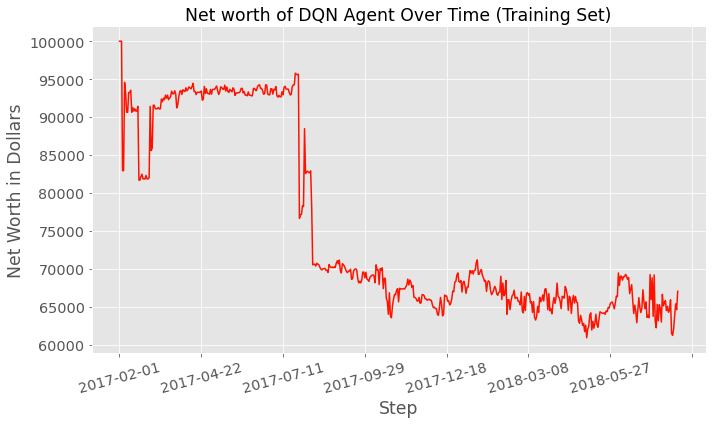

In [82]:
#Plot the networth
#dates = subset_data.index

plt.figure(figsize=(10, 6), tight_layout=True)
plt.plot(train_data.index, portfolio.performance['net_worth'], label="Net Worth")
plt.xlabel("Step")
plt.ylabel("Net Worth in Dollars")
plt.title("Net worth of DQN Agent Over Time (Training Set)")



from matplotlib.ticker import FormatStrFormatter
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(10))
plt.xticks(rotation=15)

plt.show()

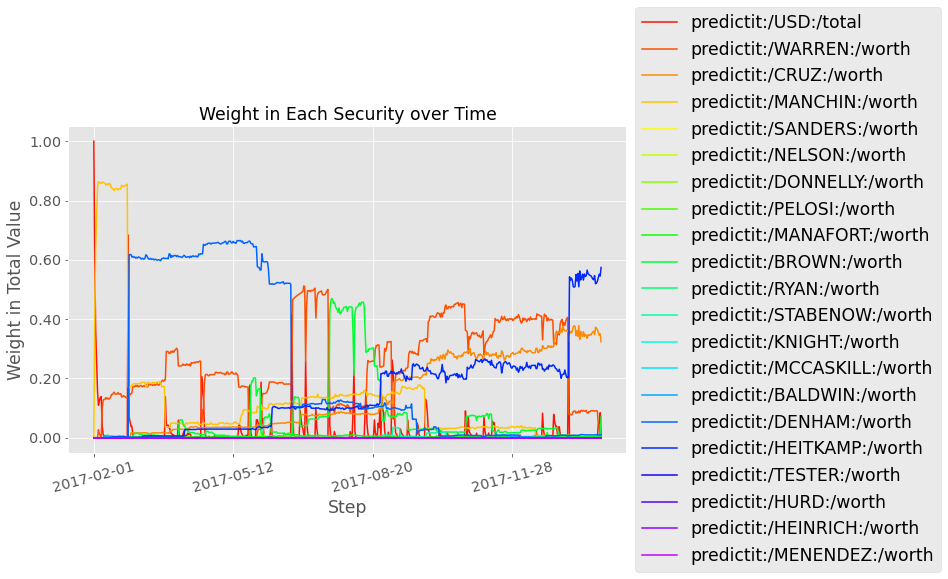

In [83]:
### Plot the total balance in each type of item
import seaborn as sns

sns.set_palette(sns.color_palette('gist_rainbow', 22))

weights_df = portfolio.weights 
weights_df.index = train_data.index

ax = weights_df.iloc[:,:].plot(figsize=(10, 6))




plt.xlabel("Step")
plt.ylabel("Weight in Total Value")
plt.title("Weight in Each Security over Time")
plt.legend(loc='center left', bbox_to_anchor=(1,.5))

from matplotlib.ticker import FormatStrFormatter
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.02f'))
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(6))
plt.xticks(rotation=15)

plt.show()

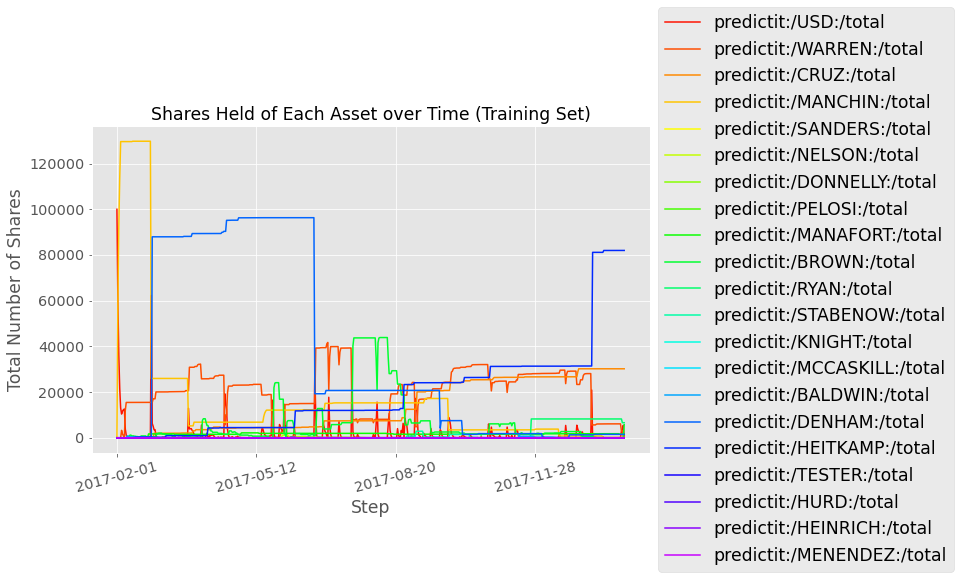

In [84]:
total_shares = portfolio.performance.loc[:, [("total" in name) for name in portfolio.performance.columns]]
total_shares.index = train_data.index
#del total_shares["predictit:/USD:/total"]
total_shares.plot(figsize=(10, 6))

sns.set_palette(sns.color_palette('gist_rainbow', 22))

from matplotlib.ticker import FormatStrFormatter
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.0f'))

plt.xlabel("Step")
plt.ylabel("Total Number of Shares")
plt.title("Shares Held of Each Asset over Time (Training Set)")
plt.legend(loc='center left', bbox_to_anchor=(1,.5))


from matplotlib.ticker import FormatStrFormatter
#plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.02f'))
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(6))
plt.xticks(rotation=15)



plt.show()

In [85]:
#Get the Four Metrics

#First, final portfolio value:
networth = portfolio.performance["net_worth"]
print("Final Portfolio value", networth.iloc[-1])

#Calculate annualized return
annualized_return = (networth.iloc[-1]/networth.iloc[0])**(365/networth.index[-1]) - 1
print("Annualized return:", annualized_return*100, "percent")


#Calculate annualized standard deviation
returns = np.multiply(networth.pct_change().dropna().values, 100)
print("Annualized Vol", np.std(returns) * (365**.5), "percent")


##Calculate (Daily) Sharpe ratio 
print("Daily Sharpe Ratio", np.mean(returns)/np.std(returns))

Final Portfolio value 67083.94594479083
Annualized return: -23.42361650944148 percent
Annualized Vol 44.345862761005186 percent
Daily Sharpe Ratio -0.01957473411786719


#### Now Compare to Baseline Strategies

In [86]:
#Split regular price data into training and testing set
all_train_data = all_data[(pd.to_datetime(all_data.index)>= '02-01-2017') & (pd.to_datetime(all_data.index) <= '08-01-2018')]
all_test_data = all_data[(pd.to_datetime(all_data.index) >= '08-02-2018') & (pd.to_datetime(all_data.index) <= '11-01-2018')]

In [87]:
#Baseline strategies for training data

#Find the asset with the best returns over time period
train_closing_prices = all_train_data.loc[:, [("close" in name) for name in all_train_data.columns]]
best_asset = train_closing_prices.iloc[:, np.argmax(train_closing_prices.iloc[-1] - train_closing_prices.iloc[0])]
best_asset = np.multiply(best_asset, 100000/best_asset[0])



#Find the portfolio value from equal balanced portfolio
initial_value = 100000
value_for_each = initial_value/20
equal_weights = value_for_each/train_closing_prices.iloc[0]
equal_balanced_portfolio = train_closing_prices.mul(equal_weights, axis=1).sum(axis=1)




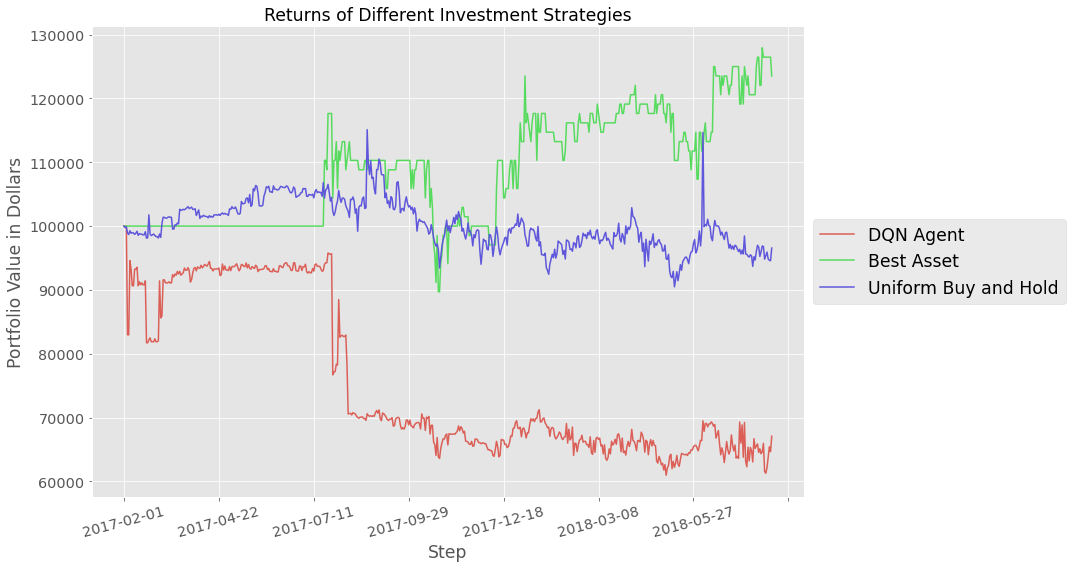

In [88]:
#Plot
sns.set_palette(sns.color_palette('hls',3))

plt.figure(figsize=(15, 8), tight_layout=True)

plt.plot(best_asset.index, portfolio.performance['net_worth'], label="DQN Agent")
plt.plot(best_asset.index, best_asset.values, label="Best Asset")
plt.plot(best_asset.index, equal_balanced_portfolio.values, label="Uniform Buy and Hold")

plt.xlabel("Step")
plt.ylabel("Portfolio Value in Dollars")
plt.title("Returns of Different Investment Strategies")

plt.legend(loc='center left', bbox_to_anchor=(1,.5))

from matplotlib.ticker import FormatStrFormatter
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(10))
plt.xticks(rotation=15)

plt.show()


## Now Testing Set Performance

#### First run agent on test set

In [89]:
test_external_feed.reset()

In [90]:
#Set up a testing environment with test data. The external feed is the only thing that's different. Environment is the same
test_env = TradingEnvironment(
    feed=test_external_feed,
    portfolio=portfolio,
    action_scheme='simple',
    reward_scheme='diversified',
    window_size=15,
    enable_logger=False,
    renderers = 'screenlog',
    use_internal = False,
)

/home/accts/jcf73/thesis/venv/lib/python3.7/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


In [91]:
#Run the test. One episode only.
for episode_num in range(1):
    state = test_env.reset()
    done = False
    cumulative_reward = 0
    step = 0
    action = trainer.compute_action(state, explore=False)
    while not done:
        action = trainer.compute_action(state, explore=False)
        print(action)
        state, reward, done, results = test_env.step(action)
        #print(reward)
        #print(state["action_mask"][326])

        cumulative_reward += reward
        
        #Render every 100 steps:
        if step % 100 == 0:
            test_env.render()
            
        step += 1
        
print("Cumulative reward: ", cumulative_reward)

46
[2020-04-20 11:08:32 PM] Step: 1
46
46
46
46
46
46
46
2
2
2
82
12
12
12
176
89
12
173
12
282
12
89
176
89
89
12
2
12
173
12
12
163
12
89
89
163
24
318
173
12
3
9
12
200
318
217
46
46
2
2
2
2
3
12
12
12
12
17
176
176
12
55
24
2
24
24
24
24
12
12
150
318
173
282
9
12
176
200
176
24
2
12
12
163
163
12
295
176
163
177
Cumulative reward:  0.010970117653931452


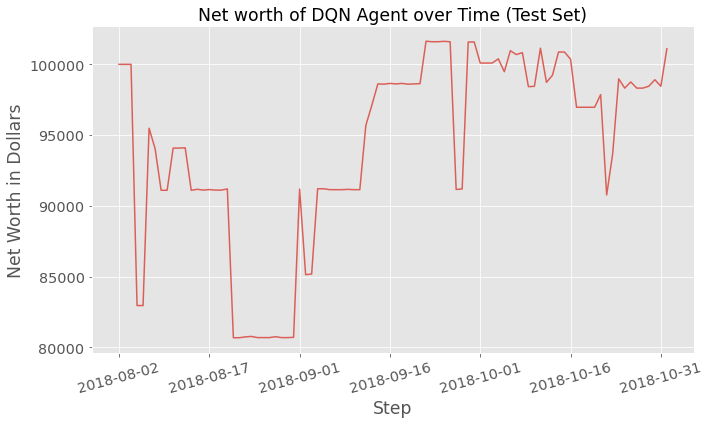

In [92]:
#Plot the networth
#dates = subset_data.index

plt.figure(figsize=(10, 6), tight_layout=True)
plt.plot(test_data.index, portfolio.performance['net_worth'], label="Net Worth")
plt.xlabel("Step")
plt.ylabel("Net Worth in Dollars")
plt.title("Net worth of DQN Agent over Time (Test Set)")



from matplotlib.ticker import FormatStrFormatter
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(10))
plt.xticks(rotation=15)

plt.show()

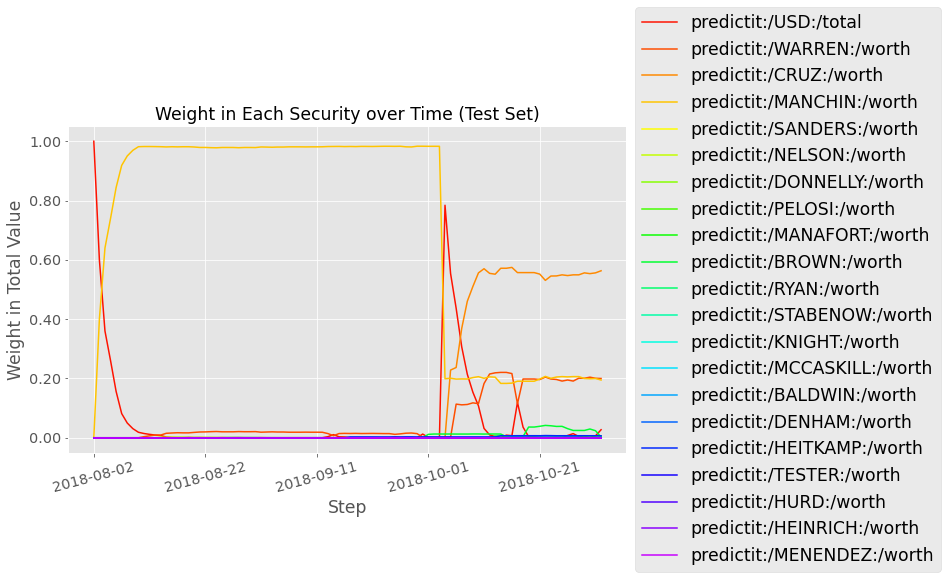

In [93]:
### Plot the total balance in each type of item
import seaborn as sns

sns.set_palette(sns.color_palette('gist_rainbow', 22))

weights_df = portfolio.weights 
weights_df.index = test_data.index

ax = weights_df.iloc[:,:].plot(figsize=(10, 6))




plt.xlabel("Step")
plt.ylabel("Weight in Total Value")
plt.title("Weight in Each Security over Time (Test Set)")
plt.legend(loc='center left', bbox_to_anchor=(1,.5))

from matplotlib.ticker import FormatStrFormatter
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.02f'))
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(6))
plt.xticks(rotation=15)

plt.show()

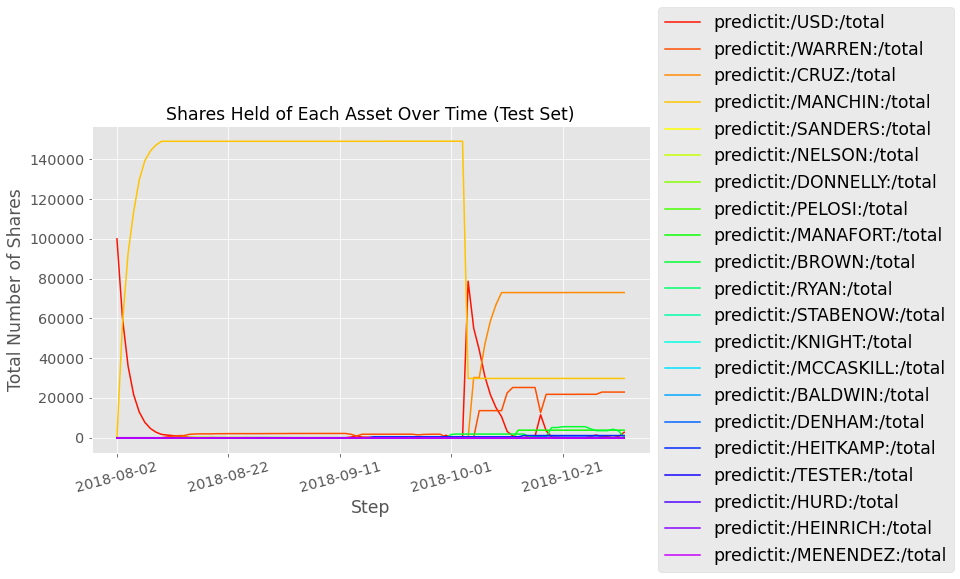

In [94]:
total_shares = portfolio.performance.loc[:, [("total" in name) for name in portfolio.performance.columns]]
total_shares.index = test_data.index
#del total_shares["predictit:/USD:/total"]
total_shares.plot(figsize=(10, 6))

sns.set_palette(sns.color_palette('gist_rainbow', 22))

from matplotlib.ticker import FormatStrFormatter
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.0f'))

plt.xlabel("Step")
plt.ylabel("Total Number of Shares")
plt.title("Shares Held of Each Asset Over Time (Test Set)")
plt.legend(loc='center left', bbox_to_anchor=(1,.5))


from matplotlib.ticker import FormatStrFormatter
#plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.02f'))
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(6))
plt.xticks(rotation=15)



plt.show()

#### Now Compare To Baseline Strategies

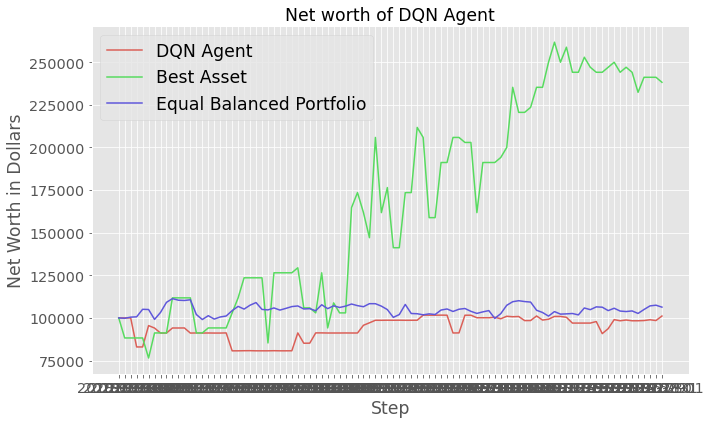

In [95]:
#### First Training Set#Now get the baseline strategies for test data


#Find the asset with the best returns over time period
test_closing_prices = all_test_data.loc[:, [("close" in name) for name in all_test_data.columns]]
best_asset = test_closing_prices.iloc[:, np.argmax(test_closing_prices.iloc[-1] - test_closing_prices.iloc[0])]
best_asset = np.multiply(best_asset, 100000/best_asset[0])



#Find the portfolio value from equal balanced portfolio
initial_value = 100000
value_for_each = initial_value/20
equal_weights = value_for_each/test_closing_prices.iloc[0]
equal_balanced_portfolio = test_closing_prices.mul(equal_weights, axis=1).sum(axis=1)



#Plot
sns.set_palette(sns.color_palette('hls',3))

plt.figure(figsize=(10, 6), tight_layout=True)

plt.plot(best_asset.index, portfolio.performance['net_worth'], label="DQN Agent")
plt.plot(best_asset.index, best_asset.values, label="Best Asset")
plt.plot(best_asset.index, equal_balanced_portfolio.values, label="Equal Balanced Portfolio")

plt.xlabel("Step")
plt.ylabel("Net Worth in Dollars")
plt.title("Net worth of DQN Agent")

plt.legend()

from matplotlib.ticker import FormatStrFormatter
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.0f'))


plt.show()


## Extra Stuff

In [ ]:
apath = "/Users/jasonfiacco/Documents/Yale/Senior/thesis/jasonfiacco-selectedmarkets-mytickers.xlsx"
df = pd.read_excel(apath, skiprows=2)
jason_tickers = df.iloc[:, 5].tolist()
descriptions = df.iloc[:, 1].tolist()

for ticker, description in zip(jason_tickers, descriptions):
    l = "{} = Instrument(\'{}\', 2, \'{}\')".format(ticker, ticker, description)
    print(l)

In [ ]:
import matplotlib.pyplot as plt
#closing_prices = test_data.loc[:, [("price_norm" in name) for name in test_data.columns]]
my_data = all_data[(pd.to_datetime(all_data.index)>= '08-02-2018')]
my_data["MANAFORT:close"].plot()


In [ ]:
closing_prices.plot(figsize=(10, 6))
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.title("Closing prices of all markets")
plt.legend(loc='center left', bbox_to_anchor=(1,.5))
plt.show()

In [53]:
portfolio.performance[["predictit:/MANAFORT:/worth", "predictit:/MANAFORT:/total"]]

,predictit:/MANAFORT:/worth,predictit:/MANAFORT:/total
step,,
0,75.0,500
1,75.0,500
2,75.0,500
3,75.0,500
4,75.0,500
...,...,...
87,75.0,500
88,75.0,500
89,75.0,500
